# Imports

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import sys
# sys.path.append('../ClusterPlot')
sys.path.append('./utils')

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from DataSetFactory import DataSetFactory
from ClusterPlot_understand import ClusterPlot

In [89]:
import os
import logging as logger
import itertools
import numpy as np
import pandas as pd
import random
import umap
import alphashape
import shapely
import seaborn as sns
import imageio
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines
from datetime import datetime
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage
from matplotlib import patches
from matplotlib.path import Path
from sklearn.manifold import MDS, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, Birch
from sklearn.neighbors import kneighbors_graph
from scipy.interpolate import splprep, splev
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, MultiPolygon
from scipy.spatial import Voronoi,voronoi_plot_2d
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier

In [155]:
np.random.seed(42)
n_instances = 10
n_dim = 2
x = np.random.normal(0., 1., size=(n_instances, n_dim))
distances = np.linalg.norm(x[:, None] - x, axis=2)
x.shape
distances.shape
x
(x[:, None]-x)

(10, 2)

(10, 10)

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ]])

(10, 10, 2)

In [90]:
RANDOM_STATE = 42
ds = DataSetFactory.get_dataset('hourglass2', random_state=RANDOM_STATE, sample=None, is_subset=False)
ds.df
ds.label_col

,X,Y,Z,Poly
0,2.664885,0.849356,-0.046342,0
1,1.608484,2.099026,-0.046573,0
2,1.863890,1.164917,-0.101283,0
3,1.584289,1.465447,0.031425,0
4,2.368466,1.760610,-0.029169,0
...,...,...,...,...
15,6.083836,1.820734,-0.010797,1
16,5.546064,1.809470,-0.000681,1
17,6.000483,2.076545,0.003640,1
18,5.579746,2.341622,0.006056,1


'Poly'

# 3D Plot

In [91]:
# input: ds  output: 3d diagram
def vis_3d_clusters(ds,df,size=100,show_label=False):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    feature_col = ds.feature_cols
#     df = ds.df
    #     x = df[feature_col]
    label = ds.label_col
    y = df[label]
    cluster_label = y.unique()
    for i in cluster_label:
        cluster_df = df[df[label]==i]
        cluster = df[df[label]==i][feature_col].values
        cluster.shape
        ax.scatter(*cluster.T, s=size, alpha=0.6, edgecolors='w')
        if show_label:
            for j, anchor_i in enumerate(cluster_df.index):
                ax.text(*cluster[j].T,
                f'{anchor_i}',
                horizontalalignment='center', size='medium',
                color='black', weight='semibold')
    return ax 

<IPython.core.display.Javascript object>


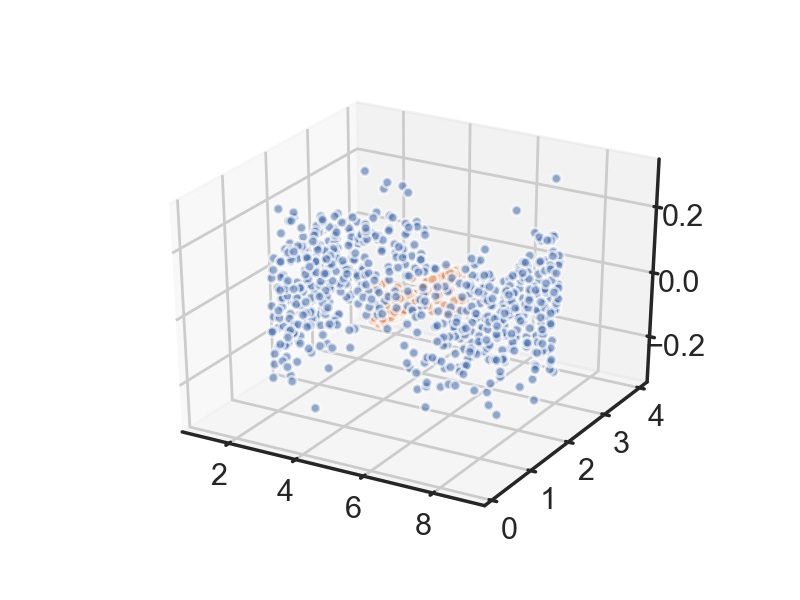

In [92]:
%matplotlib notebook

df = ds.df
ax_3d = vis_3d_clusters(ds,df,50)

In [95]:
# def vis_2d_(points,y):
#     colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                              '#f781bf', '#a65628', '#984ea3',
#                                              '#999999', '#e41a1c', '#dede00']),
#                                       int(max(y) + 1))))
#     target = np.hstack([y])
#     sns.set(style='white', context='poster')
#     fig, ax = plt.subplots(1, figsize=(4, 2))
#     plt.scatter(*points.T, s=1, color=colors[y], cmap='Spectral', alpha=1.0)
#     plt.setp(ax, xticks=[], yticks=[])
# colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                          '#f781bf', '#a65628', '#984ea3',
#                                          '#999999', '#e41a1c', '#dede00']),
#                                   int(max(y) + 1))))
# df = intra_centroids_df_vis
# feature_col = ds.feature_cols
# #     df = ds.df
# #     x = df[feature_col]
# label = ds.label_col
# y = intra_centroids_df_vis[label]
# cluster_label = y.unique()
# for i in cluster_label:
#     cluster_df = df[df[label]==i]
#     cluster = df[df[label]==i][feature_col].values
#     cluster.shape
#     ax_3d.scatter(*cluster.T, s=200, alpha=0.6)

In [96]:
# %matplotlib notebook

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# xs = ds.df[ds.df[ds.label_col] == 0]['X']
# ys = ds.df[ds.df[ds.label_col] == 0]['Y']
# zs = ds.df[ds.df[ds.label_col] == 0]['Z']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# xs = ds.df[ds.df[ds.label_col] == 1]['X']
# ys = ds.df[ds.df[ds.label_col] == 1]['Y']
# zs = ds.df[ds.df[ds.label_col] == 1]['Z']
# ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# # remove ticks
# ax = plt.gca()
# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])

# for line in ax.xaxis.get_ticklines():
#     line.set_visible(False)
# for line in ax.yaxis.get_ticklines():
#     line.set_visible(False)
# for line in ax.zaxis.get_ticklines():
#     line.set_visible(False)

# ax.view_init(elev=60, azim=60)

## plt.show()

In [97]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values
X.shape, y.shape
ds.class_to_label

((940, 3), (940,))

{0: 'Poly0', 1: 'Poly1'}

# Cplot

In [98]:
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# get intra class anchors

In [101]:
def get_intra_class_anchors(X,y):
    X.shape[0]
    cm = Birch(threshold=0.42, branching_factor = X.shape[0], n_clusters=None)
    df = pd.DataFrame(X)
    feature_cols = df.columns
    df["cluster"] = -1 
    df["label"] = y
    anchors_dfs = []
    for label in sorted(df["label"].unique()):
        df.loc[df["label"]==label, "cluster"] = cm.fit_predict(df[df["label"]==label][feature_cols].values)
        subcluster_centers = cm.subcluster_centers_
        tmp_df = pd.DataFrame(subcluster_centers,columns=feature_cols)
        tmp_df["label"] = label
        tmp_df.reset_index(inplace=True)
        tmp_df["cluster"] = tmp_df["index"]
    #     tmp_df
        anchors_dfs.append(tmp_df)
    num_clusters_each_label = df.groupby("label").nunique()["cluster"].sort_index().values #[22,4] array
    dbg_df = df #data with sub cluster
    clusters = df["cluster"].values.astype(int) #data sub cluster 
    intra_centroids_df = pd.concat(anchors_dfs) #anchors  df 
    intra_class_anchors_labels = intra_centroids_df["label"].values #anchors label array
    intra_class_anchors = intra_centroids_df[feature_cols].values #anchors x, y ,z array
    anchors_clusters = []
    for num_anchors in num_clusters_each_label:
        anchors_clusters.extend(list(range(num_anchors)))
    clusters = np.concatenate((clusters, np.asarray(anchors_clusters))) #(966,)array   存储点和anchors的label
    return (df,intra_centroids_df,num_clusters_each_label,clusters,intra_class_anchors_labels,intra_class_anchors,anchors_clusters)

,index,X,Y,Z,Poly,cluster
0,0,2.667622,0.972905,-0.000552,0,0
1,1,1.519541,2.103360,0.022125,0,1
2,2,1.928089,1.522762,-0.024118,0,2
3,3,2.609332,2.021564,0.010406,0,3
4,4,2.824716,3.245611,0.005816,0,4
5,5,2.086348,2.667287,0.008076,0,5
6,6,3.144825,0.290843,-0.116635,0,6
7,7,8.223416,1.773099,-0.005346,0,7
8,8,7.462962,0.965174,0.002252,0,8
9,9,7.283861,1.720036,0.010712,0,9


<IPython.core.display.Javascript object>


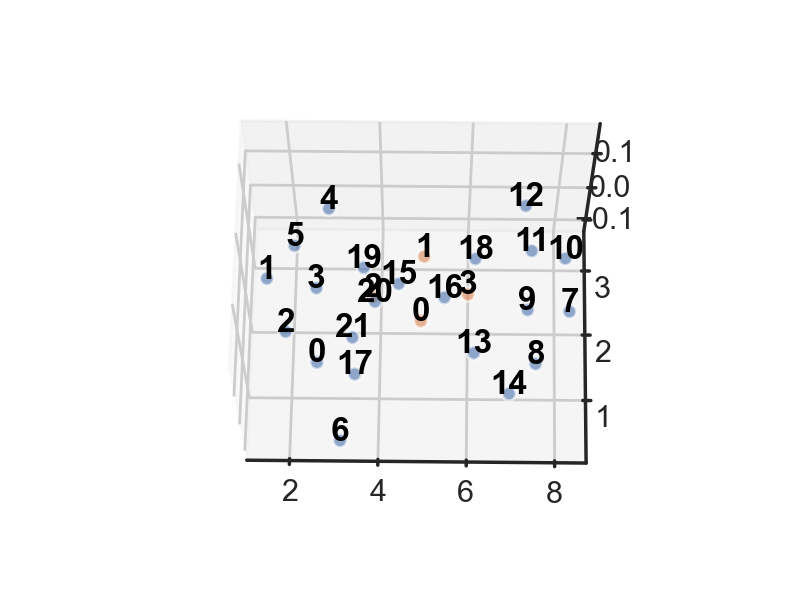

In [102]:
df,intra_centroids_df,num_clusters_each_label,clusters,intra_class_anchors_labels,intra_class_anchors,anchors_clusters = get_intra_class_anchors(X,y)
intra_centroids_df_vis = intra_centroids_df.rename(columns={'label':ds.label_col,0:"X",1:"Y",2:"Z"})
intra_centroids_df_vis
vis_3d_clusters(ds,intra_centroids_df_vis,100,True)

# calc_high_dim_cluster_properties

In [50]:
intra_class_anchors_labels
intra_centroids_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

,index,0,1,2,label,cluster
0,0,2.667622,0.972905,-0.000552,0,0
1,1,1.519541,2.103360,0.022125,0,1
2,2,1.928089,1.522762,-0.024118,0,2
3,3,2.609332,2.021564,0.010406,0,3
4,4,2.824716,3.245611,0.005816,0,4
5,5,2.086348,2.667287,0.008076,0,5
6,6,3.144825,0.290843,-0.116635,0,6
7,7,8.223416,1.773099,-0.005346,0,7
8,8,7.462962,0.965174,0.002252,0,8
9,9,7.283861,1.720036,0.010712,0,9


In [51]:
def _calc_high_dim_cluster_properties(df,intra_centroids_df):
    df = df.copy()
    intra_centroids_df = intra_centroids_df.copy()
    # Density
    anchors_density = df.groupby(["label"])["cluster"].value_counts().sort_index().values
    # Radius
    # Set index to perform matrix operations per label and cluster
    intra_centroids_df = intra_centroids_df.set_index(["label", "cluster"])
    df = df.set_index(["label", "cluster"])
    intra_centroids_df.sort_index(inplace=True)
    df.sort_index(inplace=True)
    radius_df = (df - intra_centroids_df)
    radius_df = radius_df ** 2
    radius_df = radius_df.sum(axis=1)
    radius_df = radius_df ** 0.5
    # radius_df = radius_df.groupby(level=[0, 1]).quantile(q=self.radius_q if self.radius_q is not None else 1)
    radius_df = radius_df.groupby(level=[0, 1]).quantile(q= 1)
    anchors_radius = radius_df.values
    return (anchors_radius, anchors_density)


In [52]:
# df = df.copy()
# df
# intra_centroids_df = intra_centroids_df.copy()
# # Density
# anchors_density = df.groupby(["label"])["cluster"].value_counts().sort_index().values
# # Radius
# # Set index to perform matrix operations per label and cluster
# intra_centroids_df = intra_centroids_df.set_index(["label", "cluster"])
# df = df.set_index(["label", "cluster"])
# df
# intra_centroids_df
# intra_centroids_df.sort_index(inplace=True)
# df.sort_index(inplace=True)
# radius_df = (df - intra_centroids_df)
# radius_df = radius_df ** 2
# radius_df = radius_df.sum(axis=1)
# radius_df = radius_df ** 0.5radius_df
# # radius_df = radius_df.groupby(level=[0, 1]).quantile(q=self.radius_q if self.radius_q is not None else 1)
# radius_df = radius_df.groupby(level=[0, 1]).quantile(q= 1)
# # quantile q=1 表示取最大值
# anchors_radius = radius_df.values
# # return (anchors_radius, anchors_density)
# radius_df

In [53]:
anchors_radius,anchors_density = _calc_high_dim_cluster_properties(df,intra_centroids_df) #array array 
anchors_density # num of points 
anchors_radius # radius of a anchors
# df.groupby(["label"])["cluster"].value_counts().sort_index().values #每个类包含多少个点

array([ 58,  43,  38,  65,  45,  48,   9,  55,  55,  69,  45,  40,  36,
        11,  13,  13,  14,  10,  13,   9,   7,   4, 127,  88,  10,  15],
      dtype=int64)

array([0.58994078, 0.50451823, 0.59127464, 0.62366938, 0.72034354,
       0.51494625, 0.43624202, 0.71107186, 0.65741431, 0.62912296,
       0.54474307, 0.45846435, 0.7465887 , 0.44967604, 0.46748335,
       0.69546538, 0.51362711, 0.54605717, 0.86093368, 0.54936982,
       0.42170045, 0.48603144, 0.60317404, 0.58150009, 0.58663953,
       0.54167623])

# KNN Graph

In [54]:
X_with_centroids = np.concatenate((X,intra_class_anchors), axis=0) #array 
y_with_centroids = np.concatenate((y, intra_class_anchors_labels)) #array
anchors_indices = [i for i in range(len(y_with_centroids) - len(intra_class_anchors_labels),
                                                 len(y_with_centroids))] # anchor index 940-966
knng = kneighbors_graph(X_with_centroids, 20, mode='distance', n_jobs=None)
knng

<966x966 sparse matrix of type '<class 'numpy.float64'>'
	with 19320 stored elements in Compressed Sparse Row format>

# Compute Overlap

In [55]:
def _sample_index_to_anchor(label, cluster):
    """
    Convert sample index to anchor index
    :param label: label of sample
    :param cluster: sub-cluster of sample
    :return: anchor index
    """
    anchor_index = 0
    for i in range(label):
        anchor_index += num_clusters_each_label[i]
    anchor_index += cluster
    return anchor_index

In [56]:
def _compute_high_overlap(intra_class_anchors_labels,knn,y_with_centroids):
    inter_class_relations = np.zeros((len(intra_class_anchors_labels),
                                           len(intra_class_anchors_labels)))
    num_labels = len(np.unique(intra_class_anchors_labels))
    inter_class_relations_label_level = np.zeros((num_labels, num_labels))
    edges_x1, edges_x2 = knng.nonzero()
    # Initialize inter class anchors
    for x1, x2 in zip(edges_x1, edges_x2):
        anchor_x1 = _sample_index_to_anchor(y_with_centroids[x1],clusters[x1])
        anchor_x2 = _sample_index_to_anchor(y_with_centroids[x2],clusters[x2])
        inter_class_relations[anchor_x1][anchor_x2] += 1
        inter_class_relations_label_level[y_with_centroids[x1]][y_with_centroids[x2]] += 1
    if not False:
        np.fill_diagonal(inter_class_relations, 0)

    # if self.only_inter_relations:
    #     # fill zeros in indices where anchors are from the same label
    #     for i in range(len(intra_class_anchors_labels)):
    #         for j in range(len(intra_class_anchors_labels)):
    #             label_i = intra_class_anchors_labels[i]
    #             label_j = intra_class_anchors_labels[j]
    #             # label_i = self.y_with_centroids[self.anchors_indices[i]]
    #             # label_j = self.y_with_centroids[self.anchors_indices[j]]
    #             if label_i == label_j:
    #                 inter_class_relations[i][j] = 0

    #     for i in range(len(self.inter_class_relations_label_level)):
    #         inter_class_relations_label_level[i][i] = 0
    # inter_class_relations_label_level
    # Normalize for each anchor
    sum_row = inter_class_relations.sum(axis=1, keepdims=True)
    sum_row_label_level = inter_class_relations_label_level.sum(axis=1, keepdims=True)
    # replace with 1 where the sum is 0 to avoid division by 0
    sum_row[sum_row == 0] = 1
    sum_row_label_level[sum_row_label_level == 0] = 1
    inter_class_relations = inter_class_relations / sum_row
    inter_class_relations_label_level = inter_class_relations_label_level / sum_row_label_level
#     inter_class_relations
#     inter_class_relations_label_level
    return (inter_class_relations, inter_class_relations_label_level)

In [57]:
inter_class_relations, inter_class_relations_label_level = _compute_high_overlap(intra_class_anchors_labels,knng,y_with_centroids)
# anchors(sub-clusters overlap)   labels(clusters) overlap relation.
inter_class_relations_label_level

array([[0.95137831, 0.04862169],
       [0.07749077, 0.92250923]])

# Compute Proximity

In [58]:
def _calc_proximity_matrix(anchors, intra_class_anchors_labels, proximity_k):
    """
    Calc proximity matrix
    :param dim: high or low dim
    :return: None
    """
#     if dim == 'high':
#         anchors = self.intra_class_anchors
#     else:
#         anchors = self.low_dim_anchors
    num_labels = len(np.unique(intra_class_anchors_labels))
    proximity_matrix = np.zeros((num_labels, num_labels))

    # dist matrix on anchors
    dist_mat = pairwise_distances(anchors)
    # take to inf anchors from same label
    for i in range(dist_mat.shape[0]):
        for j in range(dist_mat.shape[1]):
            if intra_class_anchors_labels[i] == intra_class_anchors_labels[j]:
                dist_mat[i][j] = np.inf
    # for each anchor find 3 closest anchors from other labels
    edges = np.argpartition(dist_mat, kth=proximity_k, axis=1)[:, :proximity_k]

    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            anchor_i = i
            anchor_j = edges[i][j]
            if dist_mat[anchor_i][anchor_j] < np.inf:
                label_i = intra_class_anchors_labels[anchor_i]
                label_j = intra_class_anchors_labels[anchor_j]
                proximity_matrix[label_i][label_j] += 1

    # Normalize for each anchor
    sum_row = proximity_matrix.sum(axis=1, keepdims=True)
    # replace with 1 where the sum is 0 to avoid division by 0
    sum_row[sum_row == 0] = 1
    proximity_matrix = proximity_matrix / sum_row

#     if dim == 'high':
#         self.high_dim_proximity_matrix = proximity_matrix
#     else:
#         self.low_dim_proximity_matrix = proximity_matrix
    return (proximity_matrix, sum_row)


In [59]:

# """
# Calc proximity matrix
# :param dim: high or low dim
# :return: None
# """
# proximity_k = 3
# #     if dim == 'high':
# anchors = intra_class_anchors
# #     else:
# #         anchors = self.low_dim_anchors
# anchors.shape
# num_labels = len(np.unique(intra_class_anchors_labels))
# proximity_matrix = np.zeros((num_labels, num_labels))

# # dist matrix on anchors
# dist_mat = pairwise_distances(anchors)
# # take to inf anchors from same label
# for i in range(dist_mat.shape[0]):
#     for j in range(dist_mat.shape[1]):
#         if intra_class_anchors_labels[i] == intra_class_anchors_labels[j]:
#             dist_mat[i][j] = np.inf
# # for each anchor find 3 closest anchors from other labels
# edges = np.argpartition(dist_mat, kth=proximity_k, axis=1)[:, :proximity_k]
# edges
# edges.shape
# for i in range(edges.shape[0]):
#     for j in range(edges.shape[1]):
#         anchor_i = i
#         anchor_j = edges[i][j]
#         if dist_mat[anchor_i][anchor_j] < np.inf:
#             label_i = intra_class_anchors_labels[anchor_i]
#             label_j = intra_class_anchors_labels[anchor_j]
#             proximity_matrix[label_i][label_j] += 1

# # Normalize for each anchor
# sum_row = proximity_matrix.sum(axis=1, keepdims=True)
# # sum_row
# # proximity_matrix
# # replace with 1 where the sum is 0 to avoid division by 0
# sum_row[sum_row == 0] = 1
# proximity_matrix = proximity_matrix / sum_row

# #     if dim == 'high':
# #         self.high_dim_proximity_matrix = proximity_matrix
# #     else:
# #         self.low_dim_proximity_matrix = proximity_matrix
# # return proximity_matrix
# # proximity_matrix

In [60]:
high_dim_proximity_matrix, high_sum_row = _calc_proximity_matrix(intra_class_anchors,intra_class_anchors_labels,3) #compute high proximity  0 1 0 1
#proximity 是计算单个类与其他类的距离的占比 这个距离的定义是由anchor点定义的，每个anchors的三个最近不同类邻居距离不为0 则计数。
high_dim_proximity_matrix

array([[0., 1.],
       [1., 0.]])

# Dim Reduction

In [61]:
def _get_contour_df(points,points_radius,intra_class_anchors_labels,reduce_all_points = False):
    """
    Add points with small margin before concave hull calculation to avoid anchors on the edges
    :return: pandas Dataframe with all points
    """
#     low_dim_arr = low_dim_anchors if not reduce_all_points else low_dim_points
    low_dim_arr = points 
    radius_q = None
    n_components = 2
    label_col = 'label'
    cluster_col = 'cluster'
    anchor_col = 'anchor'
    x_col = 'x'
    y_col = 'y'
    show_anchors = True
    show_blobs = False
    
    x_plus_arr = low_dim_arr.copy()
    x_plus_arr[:, 0] = low_dim_arr[:, 0] + (anchors_radius if radius_q is not None else 0.01)
    x_minus_arr = low_dim_arr.copy()
    x_minus_arr[:, 0] = low_dim_arr[:, 0] - (anchors_radius if radius_q is not None else 0.01)
    y_plus_arr = low_dim_arr.copy()
    y_plus_arr[:, 1] = low_dim_arr[:, 1] + (anchors_radius if radius_q is not None else 0.01)
    y_minus_arr = low_dim_arr.copy()
    y_minus_arr[:, 1] = low_dim_arr[:, 1] - (anchors_radius if radius_q is not None else 0.01)
#     if n_components > 2:
#         z_plus_arr = low_dim_arr.copy()
#         z_plus_arr[:, 2] = low_dim_arr[:, 2] + (anchors_radius if radius_q is not None else 0.01)
#         z_minus_arr = low_dim_arr.copy()
#         z_minus_arr[:, 2] = low_dim_arr[:, 2] - (anchors_radius if radius_q is not None else 0.01)
    anchors_radius = np.concatenate([low_dim_arr, x_plus_arr, x_minus_arr, y_plus_arr, y_minus_arr])
#     if n_components > 2:
#         anchors_radius = np.concatenate([anchors_radius, z_plus_arr, z_minus_arr])
    n_points_per_anchor = 1 + n_components * 2
    labels = []
    for i in range(n_points_per_anchor):
        if not reduce_all_points:
            labels.extend(intra_class_anchors_labels)
        else:
            labels.extend(y_with_centroids)
    anchors_df = pd.DataFrame(anchors_radius,
                              columns=[x_col, y_col, 'z'] if n_components > 2 else [x_col,y_col])
    anchors_df[label_col] = labels
    return anchors_df

In [62]:
umap_n_neighbors = 15
umap_min_dist = 1
n_components = 2
umap_n_neighbors = 15
random_state = RANDOM_STATE
# dim_reduction_algo_inst = MDS(n_components=n_components, random_state=RANDOM_STATE)
dim_reduction_algo_inst = umap.UMAP(n_components=n_components, min_dist=umap_min_dist,
                                                n_neighbors=umap_n_neighbors,
                                                random_state=random_state)
# 对所有点进行降维
low_dim_points = dim_reduction_algo_inst.fit_transform(
                    X_with_centroids)
low_dim_anchors = low_dim_points[anchors_indices]

# label_to_contour_df = dict()
# contours_df = _get_contour_df()

# 只对anchor进行降维
# low_dim_anchors = dim_reduction_algo_inst.fit_transform(|
#                     X_with_centroids[anchors_indices])
# # low_dim_anchors = low_dim_points[anchors_indices]

<IPython.core.display.Javascript object>


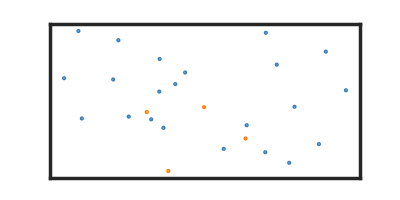

In [63]:
vis_2d_(low_dim_anchors,intra_class_anchors_labels)


In [64]:
from itertools import cycle, islice
def vis_2d_(points,y):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
    target = np.hstack([y])
    sns.set(style='white', context='poster')
    fig, ax = plt.subplots(1, figsize=(4, 2))
    plt.scatter(*points.T, s=1, color=colors[y], cmap='Spectral', alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
#     cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
#     cbar.set_ticks(np.arange(10))
def vis_2d_new(ds,df,size=100,show_label=False):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    feature_col = ['X','Y']
#     df = ds.df
    #     x = df[feature_col]
    label = ds.label_col
    y = df[label]
    cluster_label = y.unique()
    for i in cluster_label:
        cluster_df = df[df[label]==i]
        cluster = df[df[label]==i][feature_col].values
        cluster.shape
        ax.scatter(*cluster.T, s=size, alpha=0.6, edgecolors='w')
        if show_label:
            for j, anchor_i in enumerate(cluster_df.index):
                ax.text(*cluster[j].T,
                f'{anchor_i}',
                horizontalalignment='center', size='small',
                color='black', weight='semibold')
                
def vis_2d_new_ax(ax,ds,df,size=100,show_label=False):
#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111)
    feature_col = ['X','Y']
#     df = ds.df
    #     x = df[feature_col]
    label = ds.label_col
    y = df[label]
    cluster_label = y.unique()
    for i in cluster_label:
        cluster_df = df[df[label]==i]
        cluster = df[df[label]==i][feature_col].values
        cluster.shape
        ax.scatter(*cluster.T, s=size, alpha=0.6, edgecolors='w')
        if show_label:
            for j, anchor_i in enumerate(cluster_df.index):
                ax.text(*cluster[j].T,
                f'{anchor_i}',
                horizontalalignment='center', size='medium',
                color='black', weight='semibold')

<IPython.core.display.Javascript object>


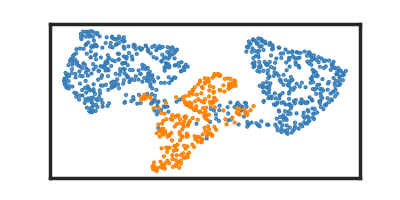

In [65]:
vis_2d_(low_dim_points,y_with_centroids)

array([[ 0.5810477 , 12.092895  ],
       [-6.982317  , 15.247809  ],
       [-3.259796  , 14.208785  ],
       [-3.7448459 ,  9.79007   ],
       [-6.6631603 ,  5.3951807 ],
       [-8.313537  ,  9.930198  ],
       [ 2.9518888 , 10.57013   ],
       [17.914335  ,  8.569643  ],
       [15.400579  ,  2.50782   ],
       [13.1330805 ,  6.7125707 ],
       [16.043118  , 12.926933  ],
       [11.476674  , 11.4557495 ],
       [10.463337  , 15.04581   ],
       [10.410554  ,  1.5907565 ],
       [12.636036  ,  0.40247336],
       [ 0.9328527 ,  4.341256  ],
       [ 6.543397  ,  1.9693002 ],
       [ 0.5461771 ,  8.423411  ],
       [ 8.681189  ,  4.636314  ],
       [-2.2970562 ,  5.6008615 ],
       [-0.2075994 ,  5.2943397 ],
       [ 2.0317912 ,  9.271544  ],
       [ 1.3894271 , -0.522613  ],
       [ 4.7144046 ,  6.66725   ],
       [-0.6169542 ,  6.113488  ],
       [ 8.574405  ,  3.1443079 ]], dtype=float32)

,X,Y,Z
0,0.581048,12.092895,-0.000552
1,-6.982317,15.247809,0.022125
2,-3.259796,14.208785,-0.024118
3,-3.744846,9.790070,0.010406
4,-6.663160,5.395181,0.005816
5,-8.313537,9.930198,0.008076
6,2.951889,10.570130,-0.116635
7,17.914335,8.569643,-0.005346
8,15.400579,2.507820,0.002252
9,13.133080,6.712571,0.010712


<IPython.core.display.Javascript object>


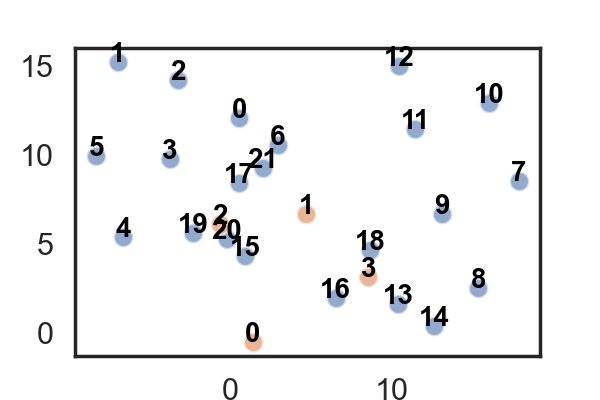

In [66]:
# vis_2d_(low_dim_anchors,intra_class_anchors_labels)
low_dim_anchors
intra_centroids_df_vis_2d = intra_centroids_df_vis
ds.feature_cols_XY = ['X','Y']
intra_centroids_df_vis_2d[ds.feature_cols]
intra_centroids_df_vis_2d[ds.feature_cols_XY] = low_dim_anchors
intra_centroids_df_vis_2d[ds.label_col] = intra_class_anchors_labels
vis_2d_new(ds,intra_centroids_df_vis_2d,200,True)

# Cplot_vis

# Blob Visualization

**_pebble_plot**:   

parameters:

ds: dataset including label_col, features_col, ds.df, ds.cluster...


df: format like ds.df

alpha: alpha for the alphashape

douglas_peucker_tolerance: tolerance for the douglas_peucker_tolerance smoothing algo


In [67]:
def _get_concave_hull(points, alpha, remove_outliers_k=None, spline=False, vis=False,
                      douglas_peucker_tolerance=0.6, smooth_iter=13):
    """
    Calculate concave hull of points
    :param alpha: alpha for alphashape algorithm
    :param remove_outliers_k: k for LOF algorithm while removing outliers
    :param spline: use spline - not recommended
    :param vis: if vis is False skipping smothing operations
    :param douglas_peucker_tolerance: tolerance for the douglas_peucker_tolerance smoothing algo
    :param smooth_iter: how many smothing iterations to do with cutting edge corner algorithm
    :return: list of smoothed shapes of concave hulls
    """
    if remove_outliers_k is not None:
        logger.debug('removing outliers', remove_outliers_k, alpha)
        clf = LocalOutlierFactor(n_neighbors=remove_outliers_k, contamination='auto')
        is_outlier = clf.fit_predict(points)
        is_outlier = is_outlier == -1
        logger.debug('before', points.shape)
        points = points[~is_outlier]
        logger.debug('after', points.shape)

#     logger.debug('alpha2', alpha2)

    alpha_shape = alphashape.alphashape(points.tolist(), alpha)
    smooth_shapes = []
    if isinstance(alpha_shape, shapely.geometry.polygon.Polygon):
        alpha_shape = [alpha_shape]
    else:  # Multipolygon
        alpha_shape = list(alpha_shape)
    for shape in list(alpha_shape):
        x, y = shape.exterior.coords.xy
        if not spline:
            if vis:
                smooth_shape = np.array(ClusterPlot._smooth_poly_Chaikins_corner_cutting_iter(
                    ClusterPlot._smooth_poly_Douglas_Peucker(list(zip(x, y)), douglas_peucker_tolerance),
                    iteration=smooth_iter))
            else:
                smooth_shape = np.array(list(zip(x, y)))
        else:
            tck, u = splprep([np.array(x), np.array(y)], s=3)
            new_points = splev(u, tck)
            x, y = new_points[0], new_points[1]
            smooth_shape = np.array(list(zip(x, y)))
        smooth_shapes.append(smooth_shape)
    return smooth_shapes


In [84]:
def _pebble_plot(ds,df,show_blobs=False,alpha=0.2, douglas_peucker_tolerance=0.6 ):
    df = df
    x_col = 'X'
    y_col = 'Y'
    label_col = ds.label_col
    line_width=2 
#     initAlpha = 0.1
    transparent = 0.1
    alpha=[alpha] * len(df[label_col].unique())
#     alpha= 0.2 
    
    smooth_iter=3 
    remove_outliers_k = None
    skip_polygons_with_area = 0.01
    ds.cluster_col = 'cluster'
    
    
    
#     figsize: tuple = (21, 15)
    figsize = (6, 4)
  
    fig, ax = plt.subplots(figsize=figsize)
    hue_order = sorted(df[label_col].unique())
#     sns.lineplot(data=df[df['anchor'] == True], x=x_col, y=y_col, hue=label_col,
#                  ax=ax,
#                  alpha=0,
#                  hue_order=hue_order)
#     minx, maxx = self.low_dim_points[:, 0].min(), self.low_dim_points[:, 0].max()
#    _get_contour_df

    # Add patches
    # draw _blobs
#     contours_df = _get_contour_df()
    
    contours_df = df

    palette = itertools.cycle(sns.color_palette())
    
    tmpAlpha = [0.3,0.2] #根据alphashape最优化得出来的
    alpha3 = []
    for label in sorted(contours_df[label_col].unique()):
        points = contours_df[contours_df[label_col] == label][[x_col, y_col]].values
#         alpha2 = alphashape.optimizealpha(points)
#         alpha3.append(alpha2)
        concave_hulls = _get_concave_hull(points, alpha=tmpAlpha[label],
                                               remove_outliers_k=remove_outliers_k,
                                               spline=False, vis=True,
                                               douglas_peucker_tolerance=douglas_peucker_tolerance,
                                               smooth_iter=smooth_iter)
        c = next(palette)
        for concave_hull in concave_hulls:
            # Skip polygons with very small area that will appear as dots
            if Polygon(concave_hull).area < skip_polygons_with_area:
                logger.debug(f'Skipping polygon of label {label} with area {Polygon(concave_hull).area}')
                continue
            coords = concave_hull
            line_cmde = [Path.MOVETO] + [Path.LINETO] * (len(coords) - 2) + [Path.CLOSEPOLY]
            path = Path(coords, line_cmde)
            patch = patches.PathPatch(path, facecolor=c, alpha=transparent, linewidth=None, edgecolor=None)
            ax.add_patch(patch)
            # patch = patches.PathPatch(path, facecolor=None, linewidth=10, edgecolor=c, fill=False)
            patch = patches.PathPatch(path, facecolor=None, linewidth=line_width, edgecolor=c, fill=False)
            ax.add_patch(patch)
    num_labels = df[label_col].nunique()
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    lgd = plt.legend(current_handles[:num_labels + 1], current_labels[:num_labels + 1],
                             bbox_to_anchor=(1.05, 1), loc=2, fontsize=24)
    vis_2d_new_ax(ax,ds,contours_df_vis)
    if show_blobs:
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=label_col,
                        style=self.cluster_col if self.show_anchors else None, ax=ax,
                        alpha=alpha if self.show_blobs else 1, legend=False,
                        hue_order=hue_order, s=240)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # remove ticks
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # remove labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.show()
    return alpha3

<IPython.core.display.Javascript object>


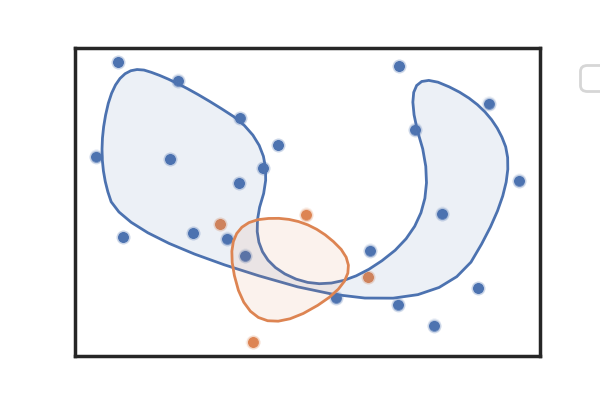

In [86]:
alpha3 = _pebble_plot(ds,contours_df_vis,douglas_peucker_tolerance=2)

In [57]:
contours_df_vis

,X,Y,Poly
0,0.581048,12.092895,0
1,-6.982317,15.247809,0
2,-3.259796,14.208785,0
3,-3.744846,9.790070,0
4,-6.663160,5.395181,0
...,...,...,...
125,2.031791,9.261544,0
126,1.389427,-0.532613,1
127,4.714405,6.657250,1
128,-0.616954,6.103488,1


**_pebble_voronio_plot**

In [70]:
def _pebble_voronio_plot(ds,df,low_dim_anchors,intra_class_anchors_labels,show_blobs=False,alpha=0.2, douglas_peucker_tolerance=0.6):
    df = df
    x_col = 'X'
    y_col = 'Y'
    label_col = ds.label_col
    line_width=2 
#     initAlpha = 0.1
    transparent = 0.1
    alpha=[alpha] * len(df[label_col].unique())
    
    smooth_iter=3 
    remove_outliers_k = None
    skip_polygons_with_area = 0.01
    ds.cluster_col = 'cluster'
    
    
    
#     figsize: tuple = (21, 15)
    figsize = (21, 15)
  
    fig, ax = plt.subplots(figsize=figsize)
    hue_order = sorted(df[label_col].unique())
    
    
#     fig, ax = plt.subplots(figsize=figsize)
#     hue_order = sorted(df[self.label_col].unique())


#     sns.lineplot(data=df[df['anchor'] == True], x=self.x_col, y=self.y_col, hue=self.label_col,
#                  ax=ax,
#                  alpha=0,
#                  hue_order=hue_order)


    points_anchors = df[[x_col,y_col]].values
    minx, maxx = points_anchors[:, 0].min(), points_anchors[:, 0].max()

    marginx = (maxx - minx) * 0.05
#     miny, maxy = self.low_dim_points[:, 1].min(), self.low_dim_points[:, 1].max()
    miny, maxy = points_anchors[:, 1].min(), points_anchors[:, 1].max()

    marginy = (maxy - miny) * 0.05
    xlim = (minx - marginx, maxx + marginx)
    ylim = (miny - marginy, maxy + marginy)
    
    
    label_to_contour_df = dict()
#   contours_df = _get_contour_df()
    contours_df = df
    tmpAlpha = [0.3,0.2] #根据alphashape最优化得出来的

    
    palette = itertools.cycle(sns.color_palette())
    for label in sorted(contours_df[label_col].unique()):
        c = next(palette)
        # Skip labels with less than 3 anchors, Voronoi does not support that
        if len(df[df[label_col]==label]) < 3:
            continue
        points = contours_df[contours_df[label_col] == label][[x_col,y_col]].values
        label_to_contour_df[label] = _get_concave_hull(points, alpha=tmpAlpha[label],
                                               remove_outliers_k=remove_outliers_k,
                                               spline=False, vis=True,
                                               douglas_peucker_tolerance=douglas_peucker_tolerance,
                                               smooth_iter=smooth_iter)
        if len(label_to_contour_df[label]) > 1:
            polygon = MultiPolygon([Polygon(p) for p in label_to_contour_df[label]])
        else:
            polygon = Polygon(label_to_contour_df[label][0])
        points = []
        
        # form voroni graph
        for anchor, anchor_label in zip(low_dim_anchors, intra_class_anchors_labels):
            if anchor_label != label:
                continue
            p = Point(anchor)
            if polygon.contains(p) or polygon.intersects(p):
                points.append(anchor)
        # handle regions with one or two points
        if len(points) == 0:
            logger.debug(
                f'all points of label {label} are outside the concave hull -> no Voroni skipping')
            continue
        if len(points) < 3:
            for i in range(len(points)):
                point = points[i]
                points.append([point[0] + 0.01, point[1]])
                points.append([point[0] - 0.01, point[1]])
                points.append([point[0], point[1] + 0.01])
                points.append([point[0], point[1] - 0.01])
        points = np.array(points)
        vor = Voronoi(points)

        regions, vertices = ClusterPlot._voronoi_finite_polygons_2d(vor)

        mask = polygon
        for region in regions:
            polygon = vertices[region]
            shape = list(polygon.shape)
            shape[0] += 1
            p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
            # intersection can create MultiPolygon
            if isinstance(p, shapely.geometry.polygon.Polygon):
                polygons = [p]
            else:  # Multipolygon
                polygons = list(p)
            for p in list(polygons):
                # skip anchors outside the polygon due to simplification
                if p.exterior is None:
                    logger.debug(f'Skipping voronoi of anchor of label {label} since it is outside '
                                      f'of polygon after simplification')
                    continue
                x, y = p.exterior.coords.xy
                inner_blobs = list(zip(x, y))
                # plot patch
                line_cmde = [Path.MOVETO] + [Path.LINETO] * (len(inner_blobs) - 2) + [Path.CLOSEPOLY]
                path = Path(inner_blobs, line_cmde)
                patch = patches.PathPatch(path, facecolor=None, linewidth=2, edgecolor=c, fill=False)
                ax.add_patch(patch)

In [78]:
blobs_cp._get_contour_df()
contours_df_vis

NameError: name 'blobs_cp' is not defined

<IPython.core.display.Javascript object>


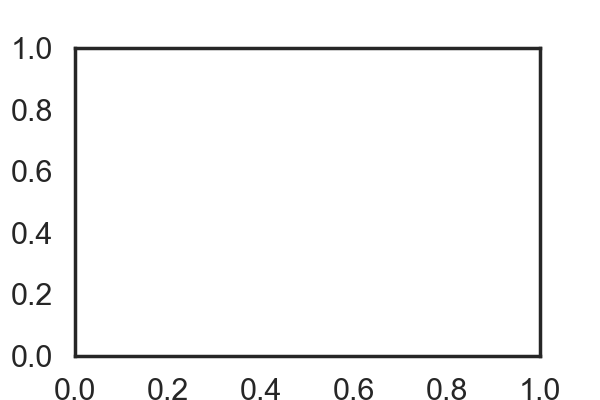

0

[[9, 4, 2, 8],
 [0, 10, 11],
 [13, 12, 0, 1],
 [15, 14, 1, 3, 5, 6],
 [7, 4, 2, 3, 5],
 [17, 6, 7, 4, 16],
 [7, 5, 6],
 [2, 3, 1, 0, 18, 19]]

1

In [75]:
# def _pebble_voronio_plot(ds,df,low_dim_anchors,intra_class_anchors_labels,alpha=0.2, douglas_peucker_tolerance=0.6):
    
df = contours_df_vis
x_col = 'X'
y_col = 'Y'
label_col = ds.label_col
line_width=2 
#     initAlpha = 0.1
transparent = 0.1
# alpha=[alpha] * len(df[label_col].unique())

show_blobs=False
smooth_iter=3 
remove_outliers_k = None
skip_polygons_with_area = 0.01
ds.cluster_col = 'cluster'
douglas_peucker_tolerance=0.6


#     figsize: tuple = (21, 15)
figsize = (6, 4)

fig, ax = plt.subplots(figsize=figsize)
hue_order = sorted(df[label_col].unique())


#     fig, ax = plt.subplots(figsize=figsize)
#     hue_order = sorted(df[self.label_col].unique())


#     sns.lineplot(data=df[df['anchor'] == True], x=self.x_col, y=self.y_col, hue=self.label_col,
#                  ax=ax,
#                  alpha=0,
#                  hue_order=hue_order)


points_anchors = df[[x_col,y_col]].values
minx, maxx = points_anchors[:, 0].min(), points_anchors[:, 0].max()

marginx = (maxx - minx) * 0.05
#     miny, maxy = self.low_dim_points[:, 1].min(), self.low_dim_points[:, 1].max()
miny, maxy = points_anchors[:, 1].min(), points_anchors[:, 1].max()

marginy = (maxy - miny) * 0.05
xlim = (minx - marginx, maxx + marginx)
ylim = (miny - marginy, maxy + marginy)


label_to_contour_df = dict()
#     contours_df = _get_contour_df()
contours_df = df
tmpAlpha = [0.3,0.2] #根据alphashape最优化得出来的


palette = itertools.cycle(sns.color_palette())
for label in sorted(contours_df[label_col].unique()):
    label
    c = next(palette)
    # Skip labels with less than 3 anchors, Voronoi does not support that
#     if len(df[df[label_col]==label].values) < 3:
#         continue
    points = contours_df[contours_df[label_col] == label][[x_col,y_col]].values
    label_to_contour_df[label] = _get_concave_hull(points, alpha=tmpAlpha[label],
                                           remove_outliers_k=remove_outliers_k,
                                           spline=False, vis=True,
                                           douglas_peucker_tolerance=douglas_peucker_tolerance,
                                           smooth_iter=smooth_iter)
#     label_to_contour_df
    if len(label_to_contour_df[label]) > 1:
        polygon = MultiPolygon([Polygon(p) for p in label_to_contour_df[label]])
    else:
        polygon = Polygon(label_to_contour_df[label][0])
#     polygon = MultiPolygon([Polygon(p) for p in label_to_contour_df[label]]) #blobs
    points = []
    # form voroni graph
    for anchor, anchor_label in zip(low_dim_anchors, intra_class_anchors_labels):
        if anchor_label != label:
            continue
        p = Point(anchor)
        if polygon.contains(p) or polygon.intersects(p):
            points.append(anchor)
    # handle regions with one or two points
#     len(points)
    if len(points) == 0:
        logger.debug(f'all points of label {label} are outside the concave hull -> no Voroni skipping')
        continue
    if len(points) < 3:
        for i in range(len(points)):
            point = points[i]
            points.append([point[0] + 0.01, point[1]])
            points.append([point[0] - 0.01, point[1]])
            points.append([point[0], point[1] + 0.01])
            points.append([point[0], point[1] - 0.01])
#     points
    points = np.array(points)
    vor = Voronoi(points)
#     fig = voronoi_plot_2d(vor)
#     plt.show()

    regions, vertices = ClusterPlot._voronoi_finite_polygons_2d(vor)
    regions
    mask = polygon
    for region in regions:
        polygon = vertices[region]
        shape = list(polygon.shape)
        shape[0] += 1
        p = Polygon(np.append(polygon, polygon[0]).reshape(*shape)).intersection(mask)
        # intersection can create MultiPolygon
        if isinstance(p, shapely.geometry.polygon.Polygon):
            polygons = [p]
        else:  # Multipolygon
            polygons = list(p)
        for p in list(polygons):
            # skip anchors outside the polygon due to simplification
#             if p.exterior is None:
#                 logger.debug(f'Skipping voronoi of anchor of label {label} since it is outside '
#                                   f'of polygon after simplification')
#                 continue
            x, y = p.exterior.coords.xy
            inner_blobs = list(zip(x, y))
            # plot patch
            line_cmde = [Path.MOVETO] + [Path.LINETO] * (len(inner_blobs) - 2) + [Path.CLOSEPOLY]
            path = Path(inner_blobs, line_cmde)
            patch = patches.PathPatch(path, facecolor=c, alpha=transparent, linewidth=None, edgecolor=None)
#             patch = patches.PathPatch(path, facecolor=None, linewidth=2, edgecolor=c, fill=False)
            ax.add_patch(patch)
    plt.show()


array([[ 0.5810477 , 12.092895  ],
       [-6.982317  , 15.247809  ],
       [-3.259796  , 14.208785  ],
       [-3.7448459 ,  9.79007   ],
       [-6.6631603 ,  5.3951807 ],
       [-8.313537  ,  9.930198  ],
       [ 2.9518888 , 10.57013   ],
       [17.914335  ,  8.569643  ],
       [15.400579  ,  2.50782   ],
       [13.1330805 ,  6.7125707 ],
       [16.043118  , 12.926933  ],
       [11.476674  , 11.4557495 ],
       [10.463337  , 15.04581   ],
       [10.410554  ,  1.5907565 ],
       [12.636036  ,  0.40247336],
       [ 0.9328527 ,  4.341256  ],
       [ 6.543397  ,  1.9693002 ],
       [ 0.5461771 ,  8.423411  ],
       [ 8.681189  ,  4.636314  ],
       [-2.2970562 ,  5.6008615 ],
       [-0.2075994 ,  5.2943397 ],
       [ 2.0317912 ,  9.271544  ],
       [ 1.3894271 , -0.522613  ],
       [ 4.7144046 ,  6.66725   ],
       [-0.6169542 ,  6.113488  ],
       [ 8.574405  ,  3.1443079 ]], dtype=float32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

<IPython.core.display.Javascript object>


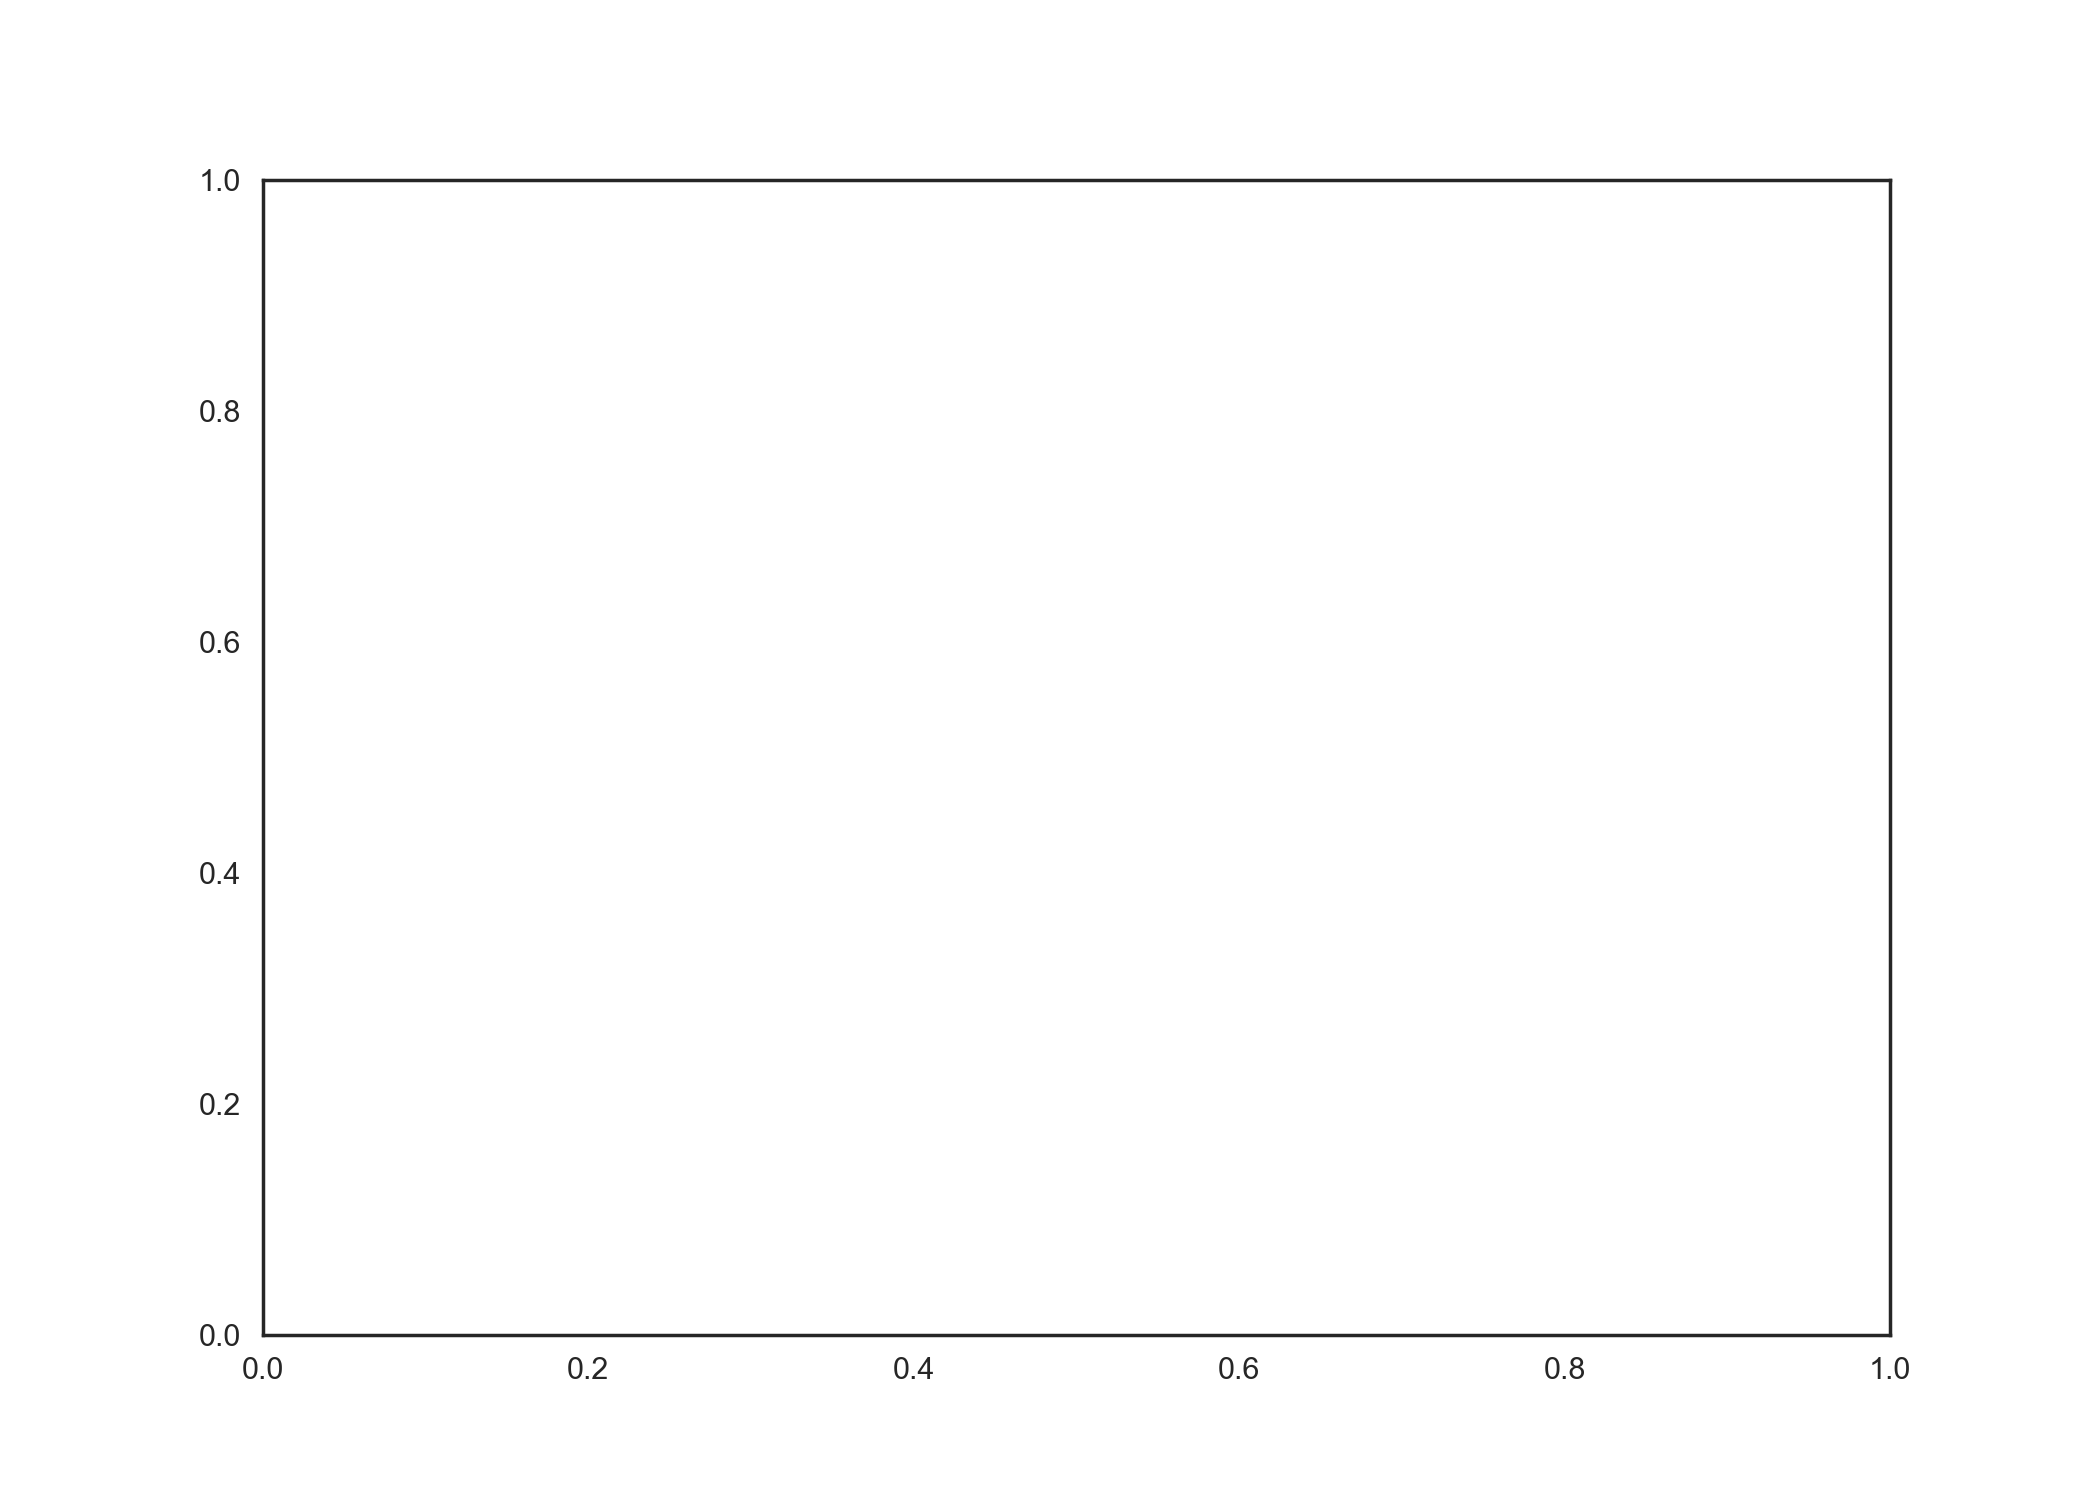

In [76]:
low_dim_anchors
intra_class_anchors_labels
_pebble_voronio_plot(ds,contours_df_vis,low_dim_anchors,intra_class_anchors_labels)

***

<IPython.core.display.Javascript object>


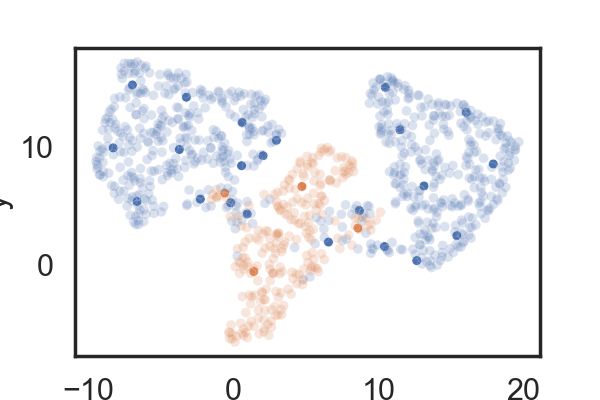

In [77]:
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
label_col = 'label'
cluster_col = 'cluster'
anchor_col = 'anchor'
x_col = 'x'
y_col = 'y'
show_anchors = True
show_blobs = False

df = pd.DataFrame(data=low_dim_points, columns=[x_col, y_col])
df[label_col] = y_with_centroids
df[cluster_col] = clusters
df[anchor_col] = False
df.loc[df.index.isin(anchors_indices), anchor_col] = True
hue_order = sorted(df[label_col].unique())
sns.scatterplot(data=df[df['anchor'] == True], x=x_col, y=y_col, hue=label_col,ax=ax,
                            alpha=0.2 if show_blobs else 1, legend=False,
                            hue_order=hue_order, s=50)
sns.scatterplot(data=df[df['anchor'] == False], x=x_col, y=y_col, hue=label_col,ax=ax,
                            alpha=0.2 if show_blobs else 0.2, legend=False,
                            hue_order=hue_order, s=50)

In [46]:
anchors_radius
low_dim_anchors

array([0.58994078, 0.50451823, 0.59127464, 0.62366938, 0.72034354,
       0.51494625, 0.43624202, 0.71107186, 0.65741431, 0.62912296,
       0.54474307, 0.45846435, 0.7465887 , 0.44967604, 0.46748335,
       0.69546538, 0.51362711, 0.54605717, 0.86093368, 0.54936982,
       0.42170045, 0.48603144, 0.60317404, 0.58150009, 0.58663953,
       0.54167623])

array([[ 0.5810477 , 12.092895  ],
       [-6.982317  , 15.247809  ],
       [-3.259796  , 14.208785  ],
       [-3.7448459 ,  9.79007   ],
       [-6.6631603 ,  5.3951807 ],
       [-8.313537  ,  9.930198  ],
       [ 2.9518888 , 10.57013   ],
       [17.914335  ,  8.569643  ],
       [15.400579  ,  2.50782   ],
       [13.1330805 ,  6.7125707 ],
       [16.043118  , 12.926933  ],
       [11.476674  , 11.4557495 ],
       [10.463337  , 15.04581   ],
       [10.410554  ,  1.5907565 ],
       [12.636036  ,  0.40247336],
       [ 0.9328527 ,  4.341256  ],
       [ 6.543397  ,  1.9693002 ],
       [ 0.5461771 ,  8.423411  ],
       [ 8.681189  ,  4.636314  ],
       [-2.2970562 ,  5.6008615 ],
       [-0.2075994 ,  5.2943397 ],
       [ 2.0317912 ,  9.271544  ],
       [ 1.3894271 , -0.522613  ],
       [ 4.7144046 ,  6.66725   ],
       [-0.6169542 ,  6.113488  ],
       [ 8.574405  ,  3.1443079 ]], dtype=float32)

<IPython.core.display.Javascript object>


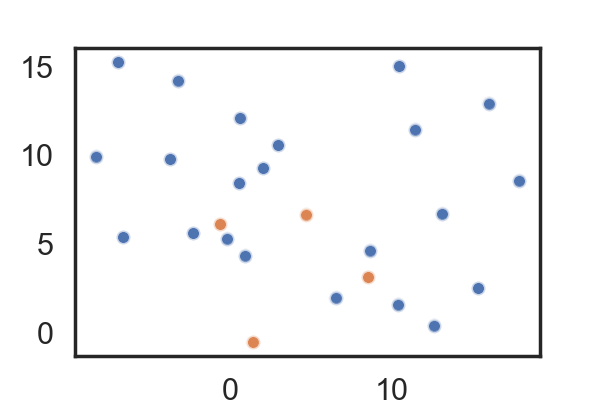

,X,Y,Poly
0,0.581048,12.092895,0
1,-6.982317,15.247809,0
2,-3.259796,14.208785,0
3,-3.744846,9.790070,0
4,-6.663160,5.395181,0
...,...,...,...
125,2.031791,9.261544,0
126,1.389427,-0.532613,1
127,4.714405,6.657250,1
128,-0.616954,6.103488,1


In [74]:
contours_df = _get_contour_df(low_dim_anchors, anchors_radius, intra_class_anchors_labels)
contours_df_vis = contours_df.rename(columns={"label":ds.label_col,"x":"X","y":"Y"})
vis_2d_new(ds,contours_df_vis,100)
contours_df_vis

In [48]:
# contours_df = self._get_contour_df()
# # palette = itertools.cycle(sns.color_palette())
# sns.set_palette(sns.color_palette(MY_PALLETE))
# palette = itertools.cycle(sns.color_palette(MY_PALLETE))
# for label in sorted(contours_df[self.label_col].unique()):
#     points = contours_df[contours_df[self.label_col] == label][[self.x_col, self.y_col]].values
#     concave_hulls = self._get_concave_hull(points, alpha=self.alpha[label],
#                                            remove_outliers_k=self.remove_outliers_k,
#                                            spline=self.use_spline, vis=True,
#                                            douglas_peucker_tolerance=douglas_peucker_tolerance,
#                                            smooth_iter=smooth_iter)
#     c = next(palette)
#     for concave_hull in concave_hulls:
#         # Skip polygons with very small area that will appear as dots
#         if Polygon(concave_hull).area < self.skip_polygons_with_area:
#             self.logger.debug(f'Skipping polygon of label {label} with area {Polygon(concave_hull).area}')
#             continue
#         coords = concave_hull
#         line_cmde = [Path.MOVETO] + [Path.LINETO] * (len(coords) - 2) + [Path.CLOSEPOLY]
#         path = Path(coords, line_cmde)
#         patch = patches.PathPatch(path, facecolor=c, alpha=0.2, linewidth=None, edgecolor=None)
#         ax.add_patch(patch)
#         patch = patches.PathPatch(path, facecolor=None, linewidth=10, edgecolor=c, fill=False)
#         ax.add_patch(patch)

# Relaxation

In [50]:
def _calc_low_dim_inter_class_relations(low_dim_points,intra_class_anchors_labels,y_with_centroids):
    """
    Calc low dim proximity and overlap
    :return: None
    """
    knng = kneighbors_graph(low_dim_points, 20, mode='distance', n_jobs=None)
    inter_class_relations_low_dim = np.zeros((len(intra_class_anchors_labels),
                                                   len(intra_class_anchors_labels)))
    num_labels = len(np.unique(intra_class_anchors_labels))
    inter_class_relations_low_dim_label_level = np.zeros((num_labels, num_labels))
    edges_x1, edges_x2 = knng.nonzero()
    # Initialize inter class anchors
    for x1, x2 in zip(edges_x1, edges_x2):
        anchor_x1 = _sample_index_to_anchor(y_with_centroids[x1], clusters[x1])
        anchor_x2 = _sample_index_to_anchor(y_with_centroids[x2], clusters[x2])
        inter_class_relations_low_dim[anchor_x1][anchor_x2] += 1
        inter_class_relations_low_dim_label_level[y_with_centroids[x1]][y_with_centroids[x2]] += 1
    if not False:
        np.fill_diagonal(inter_class_relations_low_dim, 0)

#     if only_inter_relations:
#         # fill zeros in indices where anchors are from the same label
#         for i in range(len(intra_class_anchors_labels)):
#             for j in range(len(intra_class_anchors_labels)):
#                 label_i = y_with_centroids[anchors_indices[i]]
#                 label_j = y_with_centroids[anchors_indices[j]]
#                 if label_i == label_j:
#                     inter_class_relations_low_dim[i][j] = 0

#         for i in range(len(inter_class_relations_label_level)):
#             inter_class_relations_low_dim_label_level[i][i] = 0

    # Normalize for each anchor
    sum_row = inter_class_relations_low_dim.sum(axis=1, keepdims=True)
    sum_row_label_level = inter_class_relations_low_dim_label_level.sum(axis=1, keepdims=True)
    # replace with 1 where the sum is 0 to avoid division by 0
    sum_row[sum_row == 0] = 1
    sum_row_label_level[sum_row_label_level == 0] = 1
    inter_class_relations_low_dim = inter_class_relations_low_dim / sum_row
    inter_class_relations_low_dim_label_level = \
        inter_class_relations_low_dim_label_level / sum_row_label_level
    return (inter_class_relations_low_dim, inter_class_relations_low_dim_label_level)

In [61]:
# """
# Calc low dim proximity and overlap
# :return: None
# """
# knng = kneighbors_graph(blobs_cp.low_dim_points, 20, mode='distance', n_jobs=None)
# inter_class_relations_low_dim = np.zeros((len(intra_class_anchors_labels),
#                                                len(intra_class_anchors_labels)))
# num_labels = len(np.unique(intra_class_anchors_labels))
# inter_class_relations_low_dim_label_level = np.zeros((num_labels, num_labels))
# inter_class_relations_low_dim_label_level.shape
# edges_x1, edges_x2 = knng.nonzero()
# # Initialize inter class anchors
# for x1, x2 in zip(edges_x1, edges_x2):
#     anchor_x1 = _sample_index_to_anchor(y_with_centroids[x1], clusters[x1])
#     anchor_x2 = _sample_index_to_anchor(y_with_centroids[x2], clusters[x2])
#     inter_class_relations_low_dim[anchor_x1][anchor_x2] += 1
#     inter_class_relations_low_dim_label_level[y_with_centroids[x1]][y_with_centroids[x2]] += 1
# inter_class_relations_low_dim.shape
# if not False:
#     np.fill_diagonal(inter_class_relations_low_dim, 0)

# #     if only_inter_relations:
# #         # fill zeros in indices where anchors are from the same label
# #         for i in range(len(intra_class_anchors_labels)):
# #             for j in range(len(intra_class_anchors_labels)):
# #                 label_i = y_with_centroids[anchors_indices[i]]
# #                 label_j = y_with_centroids[anchors_indices[j]]
# #                 if label_i == label_j:
# #                     inter_class_relations_low_dim[i][j] = 0

# #         for i in range(len(inter_class_relations_label_level)):
# #             inter_class_relations_low_dim_label_level[i][i] = 0

# # Normalize for each anchor
# sum_row = inter_class_relations_low_dim.sum(axis=1, keepdims=True)

# sum_row_label_level = inter_class_relations_low_dim_label_level.sum(axis=1, keepdims=True)

# # replace with 1 where the sum is 0 to avoid division by 0
# sum_row[sum_row == 0] = 1
# sum_row_label_level[sum_row_label_level == 0] = 1

# inter_class_relations_low_dim = inter_class_relations_low_dim / sum_row
# inter_class_relations_low_dim_label_level = \
#     inter_class_relations_low_dim_label_level / sum_row_label_level
# inter_class_relations_low_dim_label_level

'\nCalc low dim proximity and overlap\n:return: None\n'

(2, 2)

(26, 26)

array([[0.97022161, 0.02977839],
       [0.0352459 , 0.9647541 ]])

In [51]:
low_dim_proximity_matrix, low_sum_row = _calc_proximity_matrix(low_dim_anchors,intra_class_anchors_labels,3) #compute high proximity  0 1 0 1
inter_class_relations_low_dim,inter_class_relations_low_dim_label_level = _calc_low_dim_inter_class_relations(blobs_cp.low_dim_points,intra_class_anchors_labels,y_with_centroids)
inter_class_relations_low_dim.shape
inter_class_relations_label_level
inter_class_relations_low_dim_label_level

NameError: name 'blobs_cp' is not defined

In [111]:
class Relaxation:
    def __init__(self,high_overlap,low_overlap,anchor_label):
        self.inter_class_relations = high_overlap
        self.inter_class_relations_low_dim = low_overlap
        self.anchor_label = intra_class_anchors_labels

In [113]:
hourGlassCplot = Relaxation(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels)

In [120]:
def _mask_inter_class_relations(inter_class_relations,inter_class_relations_low_dim, intra_class_anchors_labels):
    """
    Mask out from overlap matrix relations between sub-clusters in the same label
    :return:
    """
#     inter_class_relations = inter_class_relations
#     inter_class_relations_low_dim = inter_class_relations_low_dim
    mask_relation_in_same_label = True
    if mask_relation_in_same_label:
        for i in range(len(intra_class_anchors_labels)):
            for j in range(len(intra_class_anchors_labels)):
                label_i = intra_class_anchors_labels[i]
                label_j = intra_class_anchors_labels[j]
                if label_i == label_j:
                    inter_class_relations[i][j] = 0
                    inter_class_relations_low_dim[i][j] = 0
    mask_sparse_subcluster = None
#     if mask_sparse_subcluster is not None:
#         mask = np.tile(anchors_density < mask_sparse_subcluster, (len(anchors_density), 1)).T
#         inter_class_relations[mask] = 0
#         inter_class_relations_low_dim[mask] = 0
    return inter_class_relations, inter_class_relations_low_dim

def _get_top_anchors_to_relax(self):
    """
    Get top greedy anchors with the highest loss value to perform relaxatio on them
    :return: Tuple (np array of anchors indices to relax, np array of target anchors indices, np array of directions, np array of magnitudes)
    """
    inter_class_relations, inter_class_relations_low_dim = _mask_inter_class_relations(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels)

    diff_mat = inter_class_relations - inter_class_relations_low_dim
    # diff_mat = inter_class_relations - inter_class_relations_low_dim
    inter_class_relation_loss = np.absolute(diff_mat)
    # if self relation is enable there is no point to calculate the loss from anchor to itself
    # because it is impossible to relax this anchor with respect to itself
    self_relation = False
    if self_relation:
        np.fill_diagonal(inter_class_relation_loss, 0)
    src_anchor_indices, target_anchor_indices = np.unravel_index(np.argsort(inter_class_relation_loss, axis=None),
                                                                 inter_class_relation_loss.shape)
    # revers indices
    src_anchor_indices = src_anchor_indices[::-1]
    target_anchor_indices = target_anchor_indices[::-1]
    directions = np.full_like(src_anchor_indices, -1)
    magnitudes = inter_class_relation_loss[src_anchor_indices, target_anchor_indices]
    # if diff is positive it means that the inter relation in the high dimension is higher
    # which means that these anchors should be closer
    # otherwise they should be distant
    directions[diff_mat[src_anchor_indices, target_anchor_indices] > 0] = 1
    return src_anchor_indices[:top_greedy], target_anchor_indices[:top_greedy], directions[
                                                                                          :top_greedy], magnitudes[
                                                                                                             :top_greedy]

def _l_inf_loss(X, Y):
    return np.absolute(X - Y).max()

def _get_top_anchors_to_relax(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels):
    """
    Get top greedy anchors with the highest loss value to perform relaxatio on them
    :return: Tuple (np array of anchors indices to relax, np array of target anchors indices, np array of directions, np array of magnitudes)
    """
    inter_class_relations, inter_class_relations_low_dim = _mask_inter_class_relations(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels)
    top_greedy = 1 # How many anchors to relax in each iteration
    
    
    diff_mat = inter_class_relations - inter_class_relations_low_dim
    # diff_mat = inter_class_relations - inter_class_relations_low_dim
    inter_class_relation_loss = np.absolute(diff_mat)
    # if self relation is enable there is no point to calculate the loss from anchor to itself
    # because it is impossible to relax this anchor with respect to itself
    self_relation = False
    if self_relation:
        np.fill_diagonal(inter_class_relation_loss, 0)
    src_anchor_indices, target_anchor_indices = np.unravel_index(np.argsort(inter_class_relation_loss, axis=None),
                                                                 inter_class_relation_loss.shape)
    # revers indices
    src_anchor_indices = src_anchor_indices[::-1]
    target_anchor_indices = target_anchor_indices[::-1]
    directions = np.full_like(src_anchor_indices, -1)
    magnitudes = inter_class_relation_loss[src_anchor_indices, target_anchor_indices]
    # if diff is positive it means that the inter relation in the high dimension is higher
    # which means that these anchors should be closer
    # otherwise they should be distant
    directions[diff_mat[src_anchor_indices, target_anchor_indices] > 0] = 1
    return src_anchor_indices[:top_greedy], target_anchor_indices[:top_greedy], directions[
                                                                                          :top_greedy], magnitudes[
                                                                                                             :top_greedy]

def _anchor_to_label_cluster(anchor_index, visualization=False):
    """
    Get label and sub-cluster by anchor_index
    :param anchor_index: index of anchor
    :param visualization: for vis or not
    :return: Tuple (label, sub-cluster)
    """
    anchors_count = 0
    for i in range(len(num_clusters_each_label) - 1):
        if anchors_count <= anchor_index < anchors_count + num_clusters_each_label[i]:
            if visualization and class_to_label is not None:
                return class_to_label[i], anchor_index - anchors_count
            else:
                return i, anchor_index - anchors_count
        anchors_count += num_clusters_each_label[i]
    if visualization and class_to_label is not None:
        return class_to_label[len(num_clusters_each_label) - 1], anchor_index - anchors_count
    else:
        return len(num_clusters_each_label) - 1, anchor_index - anchors_count

def _relax_anchor_cluster(src_anchor_index, target_anchor_index, direction, magnitude):
    """
    Perform one step of relaxation on one anchor
    :param src_anchor_index: anchor to relax
    :param target_anchor_index: target anchor to relax in his direction
    :param direction: positive or negative
    :param magnitude: in which magnitude to relax
    :return: None
    """
    mask_sparse_subcluster = None
    magnitude_step = False
#     if mask_sparse_subcluster is not None and anchors_density[
#         src_anchor_index] < mask_sparse_subcluster:
#         logger.debug(
#             f'Skipping relaxation of src {src_anchor_index} ({anchors_density[src_anchor_index]}) '
#             f'and target {target_anchor_index} ({anchors_density[target_anchor_index]})')
#         return
    logger.debug(
        f'src: {src_anchor_index} target {target_anchor_index} dir {direction} density {anchors_density[src_anchor_index]}'
        f'loss: {inter_class_relations[src_anchor_index][target_anchor_index] - inter_class_relations_low_dim[src_anchor_index][target_anchor_index]}')
    src_anchor, target_anchor = low_dim_anchors[src_anchor_index], low_dim_anchors[target_anchor_index]
    direction_vec = target_anchor - src_anchor
    # update low dim points of all points in the same label cluster
    label, cluster = _anchor_to_label_cluster(src_anchor_index)
    label_indices = np.argwhere(y_with_centroids == label)
    cluster_indices = np.argwhere(clusters == cluster)
    label_cluster_indices = np.intersect1d(label_indices, cluster_indices)
    if not magnitude_step:
        magnitude = 1
    learning_rate = 0.1
    if learning_rate is not None:
        magnitude = magnitude * learning_rate
    logger.debug(
        f'update src {src_anchor_index} to target {target_anchor_index} dir {direction} magnitude {magnitude} direction_vec {direction_vec}')
    low_dim_points[label_cluster_indices] = low_dim_points[
                                                     label_cluster_indices] + direction * magnitude * direction_vec
    # update also the low dim anchors
    low_dim_anchors[src_anchor_index] = low_dim_anchors[
                                                 src_anchor_index] + direction * magnitude * direction_vec
    return low_dim_anchors

def _relaxation(inter_class_relations,intra_class_anchors_labels):
    """
    Perform relaxation/optimization
    :return: None
    """
    losses = [] 
    stop_criteria = 0.00001
    batch_size = 1
    n_iter = 10
    saved_iterations_for_gif = []
    for i in range(n_iter):
        inter_class_relations_low_dim,inter_class_relations_low_dim_label_level = _calc_low_dim_inter_class_relations(blobs_cp.low_dim_points,intra_class_anchors_labels,y_with_centroids)
#         _calc_proximity_matrix('low')
        inter_class_relations_low_dim
        inter_class_relations, inter_class_relations_low_dim = _mask_inter_class_relations(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels)
        loss = _l_inf_loss(inter_class_relations, inter_class_relations_low_dim)
        if loss < stop_criteria:
            logger.info(f'loss {loss} < stopping criteria {stop_criteria} nothing to do')
            return
        losses.append(loss)
        logger.info(f'Starting iteration {i + 1} loss = {loss}')
        is_first = True
        for j in range(batch_size):
            src_anchor_indices, target_anchor_indices, directions, magnitudes = _get_top_anchors_to_relax(inter_class_relations,inter_class_relations_low_dim,intra_class_anchors_labels)
            for ra_i in range(len(src_anchor_indices)):
                _relax_anchor_cluster(src_anchor_indices[ra_i], target_anchor_indices[ra_i], directions[ra_i],
                                           magnitudes[ra_i])

In [121]:
_relaxation(inter_class_relations,intra_class_anchors_labels)

NameError: name 'low_dim_points' is not defined

# Cluster Plots

In [165]:
%matplotlib inline
blobs_cp = ClusterPlot(reduce_all_points=True,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  save_fig=False,
                  random_state=RANDOM_STATE,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=False,
                  show_anchor_level_plot=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance= 0,
                  smooth_iter=3,
                  magnitude_step=False,
                  show_loss_plot=False,
                  show_anchors=True,
                  show_anchors_annotation=True,
                  show_points=True,
                  uniform_points_per='label',
                  point_margin = 0.001,
                  supervised = False,
                      )

2021-11-04 09:43:04,568 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
INFO:ClusterPlot-18645:finding intra class anchors using birch
2021-11-04 09:43:04,769 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
INFO:ClusterPlot-18645:UnSupervised Dim Reduction
2021-11-04 09:43:04,773 - ClusterPlot-18645 - INFO - Dim Reduction all points
INFO:ClusterPlot-18645:Dim Reduction all points
2021-11-04 09:43:08,889 - ClusterPlot-18645 - INFO - Starting iteration 1 loss = 0.18290882244370615
INFO:ClusterPlot-18645:Starting iteration 1 loss = 0.18290882244370615


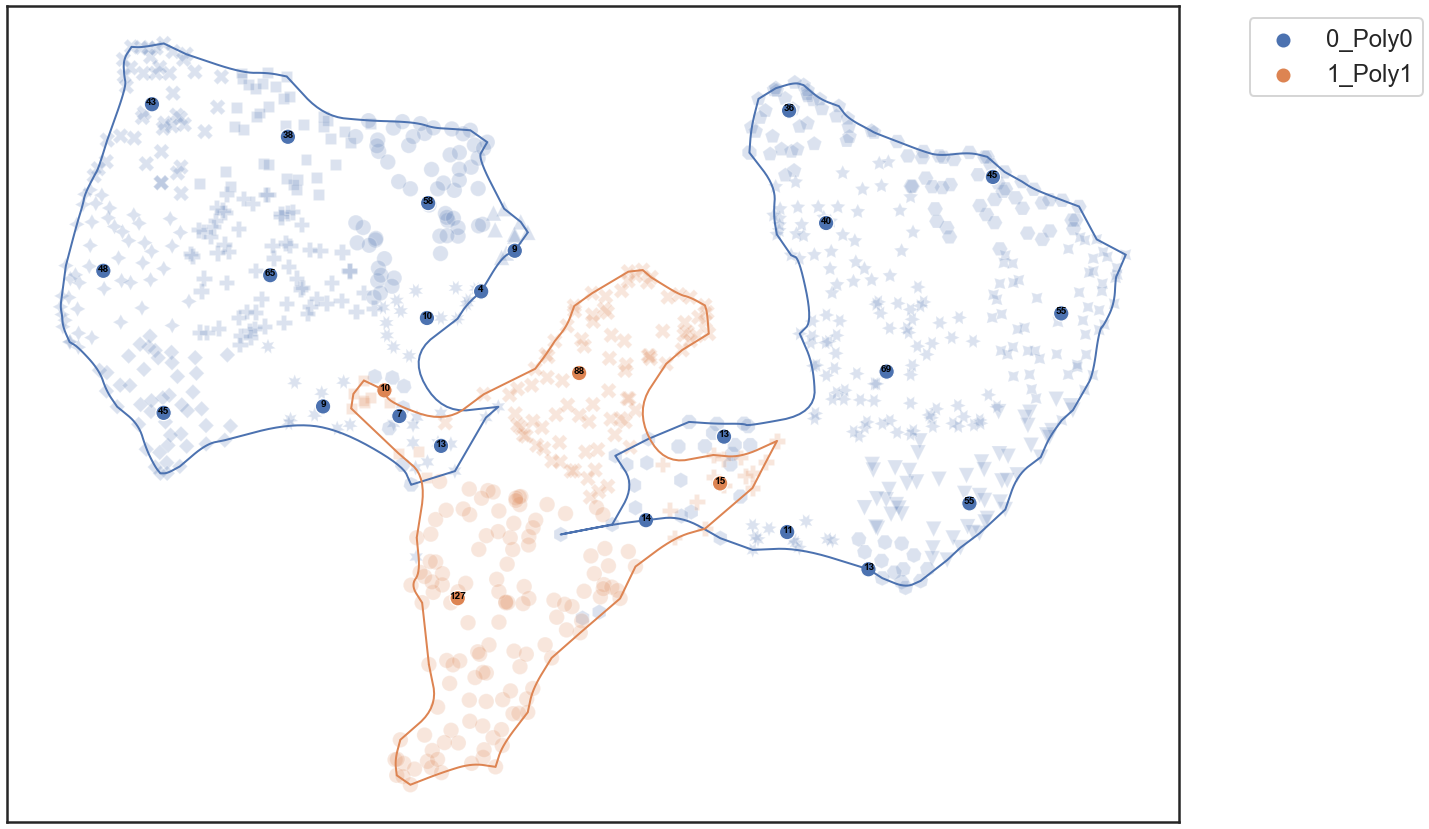

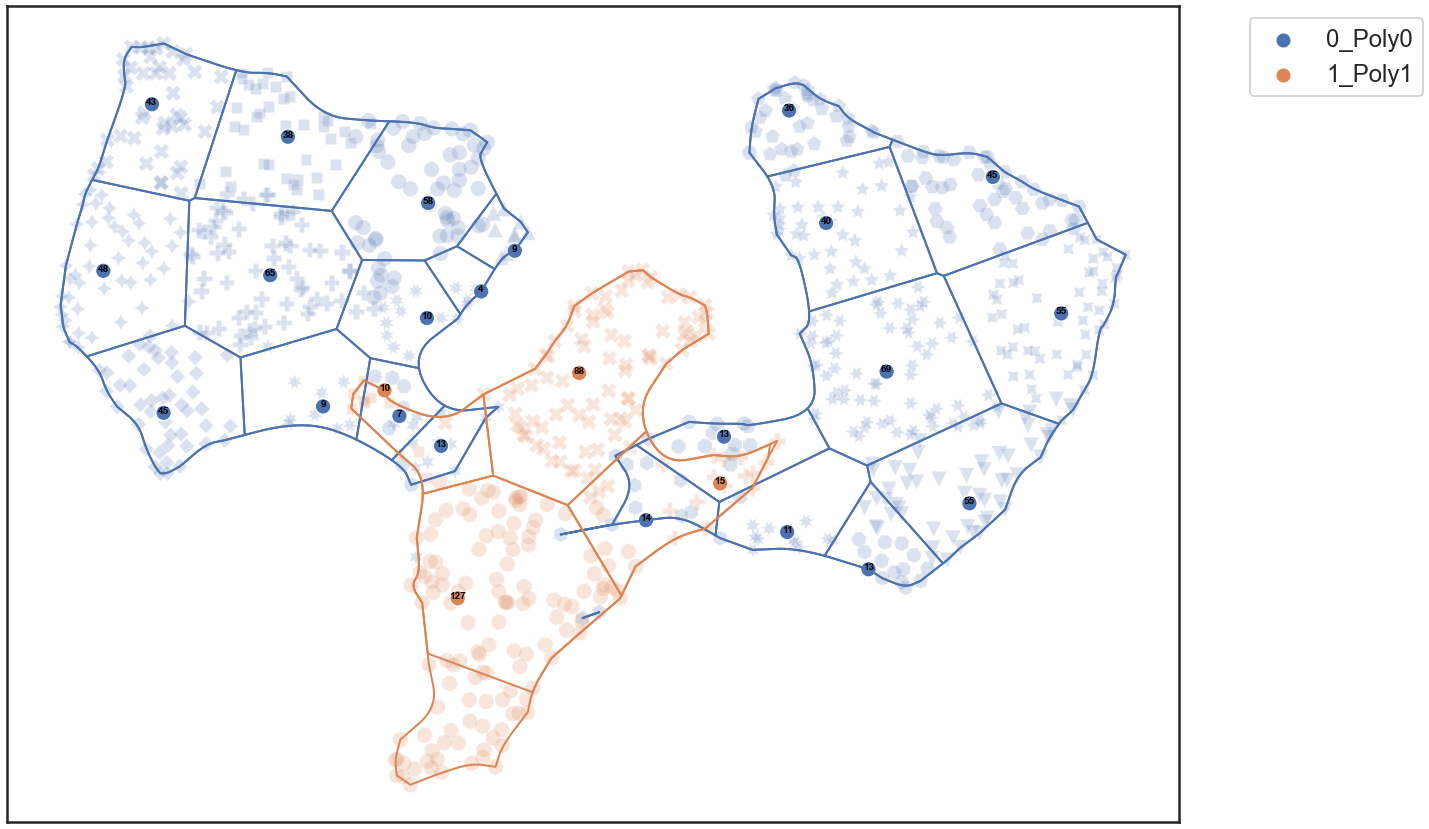

In [166]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)

array([[ -9.8867739 ,   6.56164231],
       [ -9.99668012,   4.78148809],
       [-10.33192251,   6.14970494],
       ...,
       [ -5.50162697,   7.89037752],
       [ -7.85364437,   8.10002041],
       [ -4.4596982 ,   6.6718297 ]])

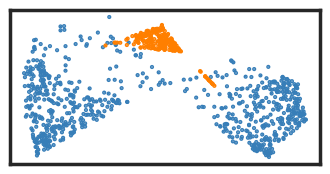

In [54]:
blobs_cp.low_dim_points
vis_2d_(blobs_cp.low_dim_points,y_with_centroids)

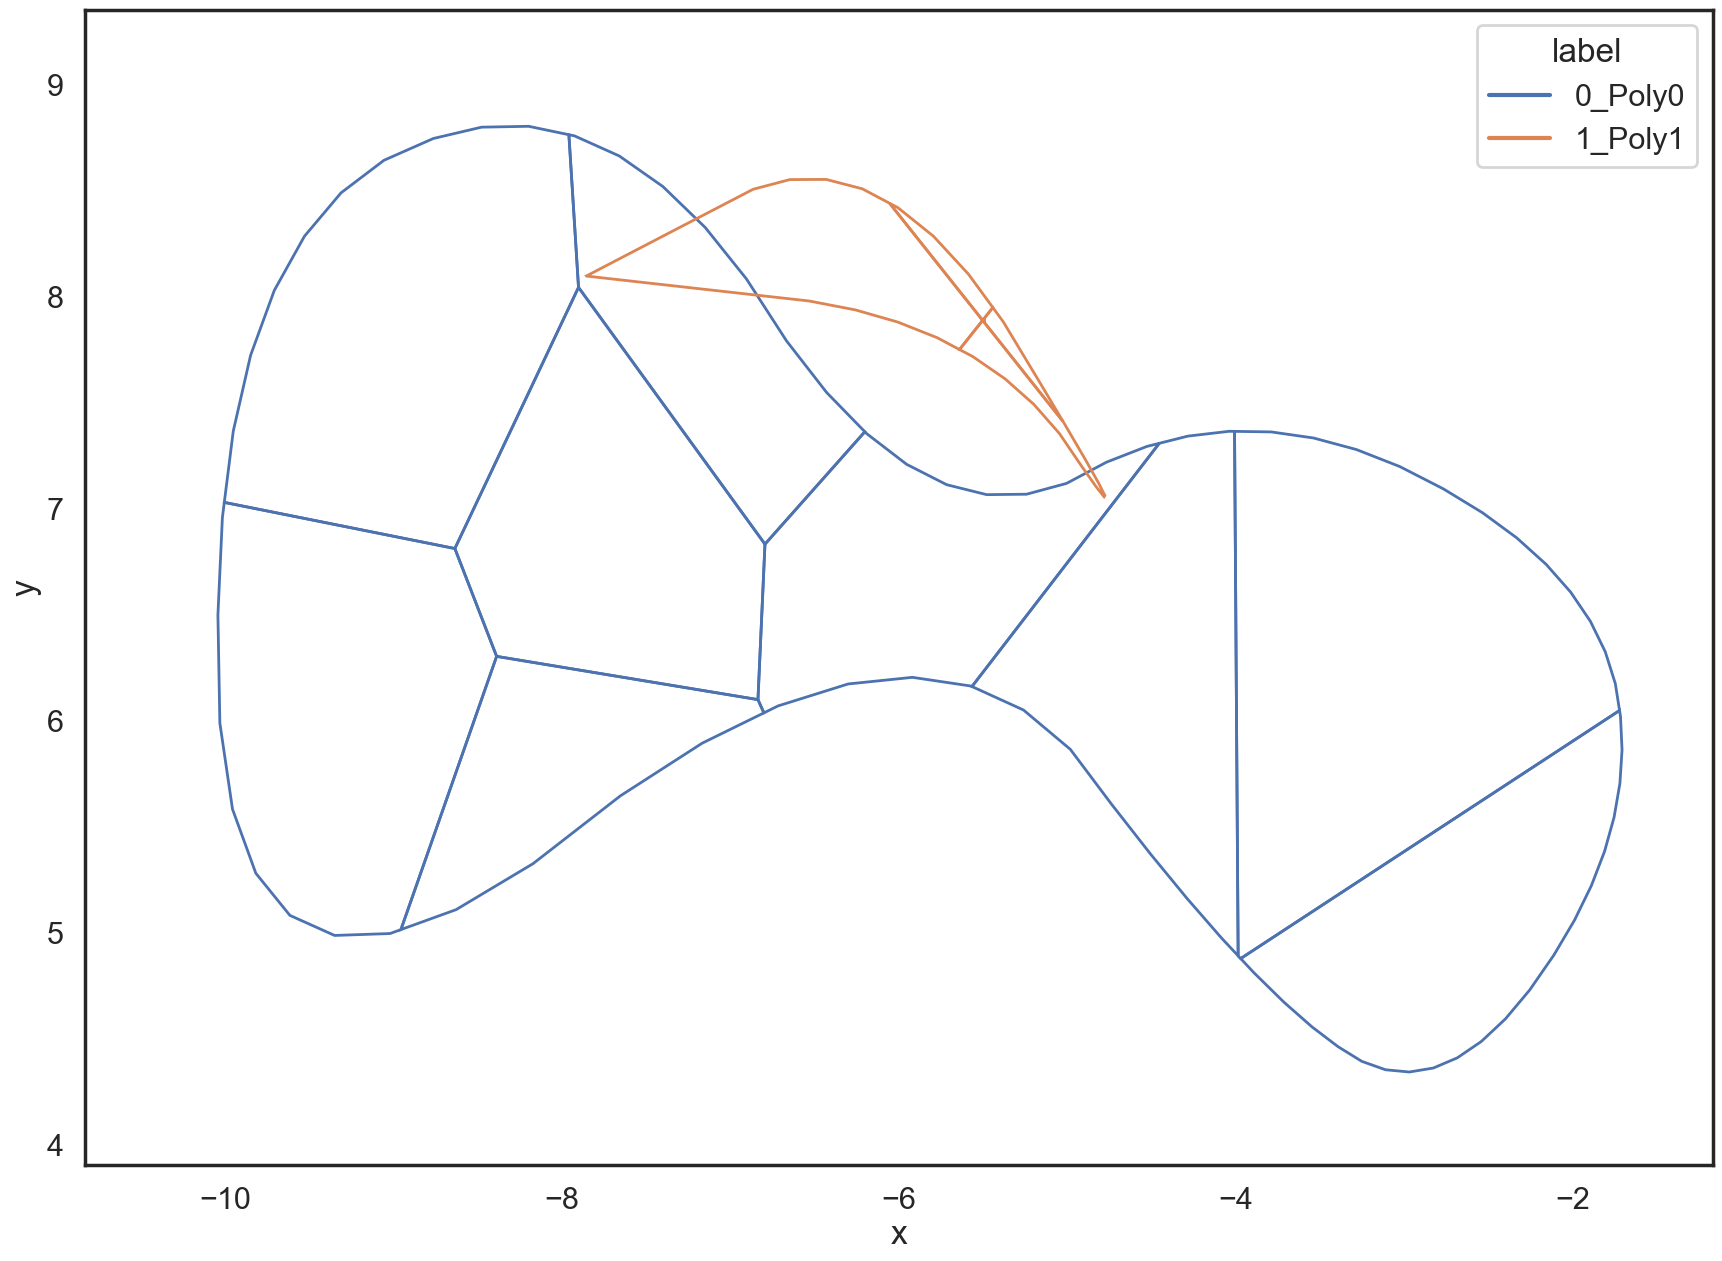

In [55]:
blobs_cp._pebble_voronio_plot()

In [652]:
blobs_cp.vis

,x,y,label,cluster,anchor
0,-9.886774,6.561642,0_Poly0,0,False
1,-9.996680,4.781488,0_Poly0,1,False
2,-10.331923,6.149705,0_Poly0,2,False
3,-10.182778,6.308032,0_Poly0,2,False
4,-8.980880,5.704947,0_Poly0,3,False
...,...,...,...,...,...
961,-9.256233,8.773458,0_Poly0,21,True
962,-6.094667,8.825800,1_Poly1,0,True
963,-5.501627,7.890378,1_Poly1,1,True
964,-7.853644,8.100020,1_Poly1,2,True


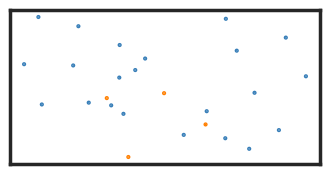

In [454]:
vis_2d_(blobs_cp.low_dim_anchors,intra_class_anchors_labels)

# Compare Different Cluster Algorithum In 3D Hourglass

# Birch - Cplot

In [51]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#ff0000','#00ff00','#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
anchors = blobs_cp.intra_class_anchors
anchors_label = blobs_cp.intra_class_anchors_labels
ax_3d.scatter(*anchors.T,s=100,color=colors[anchors_label])
anchors_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

<IPython.core.display.Javascript object>


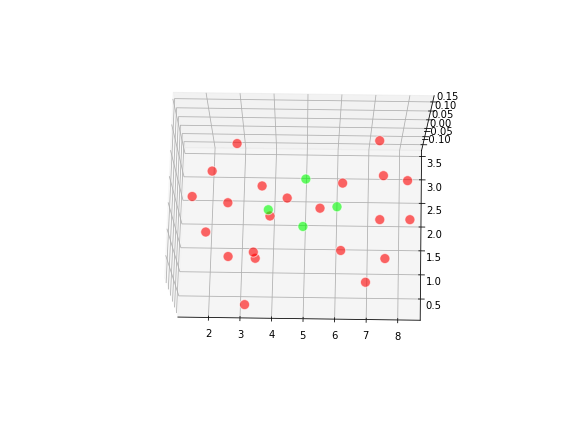

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*anchors.T, s=100, alpha=0.6, edgecolors='w',color=colors[anchors_label])

In [94]:
blobs_cp.intra_class_anchors

array([[ 2.66762177e+00,  9.72904936e-01, -5.52214163e-04],
       [ 1.51954150e+00,  2.10335993e+00,  2.21247150e-02],
       [ 1.92808942e+00,  1.52276157e+00, -2.41175321e-02],
       [ 2.60933160e+00,  2.02156425e+00,  1.04062108e-02],
       [ 2.82471612e+00,  3.24561067e+00,  5.81599766e-03],
       [ 2.08634754e+00,  2.66728718e+00,  8.07584619e-03],
       [ 3.14482478e+00,  2.90843289e-01, -1.16634547e-01],
       [ 8.22341555e+00,  1.77309870e+00, -5.34591490e-03],
       [ 7.46296204e+00,  9.65173524e-01,  2.25249909e-03],
       [ 7.28386108e+00,  1.72003617e+00,  1.07120129e-02],
       [ 8.13795783e+00,  2.55889893e+00, -3.27348014e-03],
       [ 7.38099751e+00,  2.62320772e+00,  6.72098885e-03],
       [ 7.26331715e+00,  3.40198882e+00, -1.19335884e-02],
       [ 6.10678001e+00,  1.10920153e+00,  4.39287710e-03],
       [ 6.86732807e+00,  4.26737276e-01,  2.78404148e-02],
       [ 4.42317240e+00,  2.20063919e+00, -1.25219739e-02],
       [ 5.44631796e+00,  2.00720731e+00

# Agglomerative Clustering

In [165]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Agg_X = ds.df[ds.feature_cols].values
# Agg_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=3).fit(Agg_X)


In [218]:
def cm_methonds(cm,ds):
    label = ds.label_col
    y = ds.df[label]
    cluster_label = y.unique()
    newDf = pd.DataFrame(columns=ds.df.columns)
    for i in cluster_label:
        tmpDf = pd.DataFrame(columns=ds.df.columns)
        feature_col = ds.feature_cols
        label = ds.label_col
        cluster_X = df[df[label]==i][feature_col].values
        sub_clusters = cm.fit(cluster_X)
    #     sub_clusters.n_clusters_
        clf = NearestCentroid()
        clf.fit(cluster_X,sub_clusters.labels_)
        centroid = clf.centroids_
        tmpDf[label] = i
        tmpDf[feature_col] = centroid
        tmpDf[label] = i
    #     centroid
        newDf = newDf.append(tmpDf)
    return newDf

In [211]:
def cm_methonds(cm,ds,name="no"):
    label = ds.label_col
    y = ds.df[label]
    cluster_label = y.unique()
    newDf = pd.DataFrame(columns=ds.df.columns)
    for i in cluster_label:
        tmpDf = pd.DataFrame(columns=ds.df.columns)
        feature_col = ds.feature_cols
        label = ds.label_col
        cluster_X = df[df[label]==i][feature_col].values
#         cm_agglomeratve = AgglomerativeClustering(n_clusters=None,distance_threshold=1).fit(cluster_X)
    #     cm.n_clusters_
        clf = NearestCentroid()
        clf.fit(cluster_X,cm.labels_)
        centroid = clf.centroids_
        tmpDf[label] = i
        tmpDf[feature_col] = centroid
        tmpDf[label] = i
    #     centroid
        newDf = newDf.append(tmpDf)
    return newDf

In [196]:
cm_agglomeratve = AgglomerativeClustering(n_clusters=None,distance_threshold=1)

cm_agglomeratve_df = cm_methonds(cm_agglomeratve,ds)
cm_agglomeratve_df

,X,Y,Z,Poly
0,2.253037,2.118967,-0.009025,0
1,7.267188,3.532417,-0.013168,0
2,7.177283,0.999445,0.011875,0
3,1.754476,2.019958,-0.039288,0
4,3.668447,1.594675,0.009315,0
...,...,...,...,...
7,4.921618,1.947748,-0.000713,1
8,3.774301,2.035750,0.004665,1
9,4.359567,1.998942,-0.002401,1
10,5.643217,1.992139,-0.003019,1


In [258]:
label = ds.label_col
y = ds.df[label]
cluster_label = y.unique()
newDf = pd.DataFrame(columns=ds.df.columns)
for i in cluster_label:
    tmpDf = pd.DataFrame(columns=ds.df.columns)
    feature_col = ds.feature_cols
    label = ds.label_col
    cluster_X = df[df[label]==i][feature_col].values
    sub_clusters = AgglomerativeClustering(n_clusters=None,distance_threshold=1).fit(cluster_X)
#     sub_clusters.n_clusters_
    clf = NearestCentroid()
    clf.fit(cluster_X,sub_clusters.labels_)
    centroid = clf.centroids_
    tmpDf[label] = i
    tmpDf[feature_col] = centroid
    tmpDf[label] = i
#     centroid
    newDf = newDf.append(tmpDf)
#     newDf
#     sub_clusters_centroid = clf.centroids_
newDf

NearestCentroid()

NearestCentroid()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59,  0,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11],
           dtype='int64')

<IPython.core.display.Javascript object>


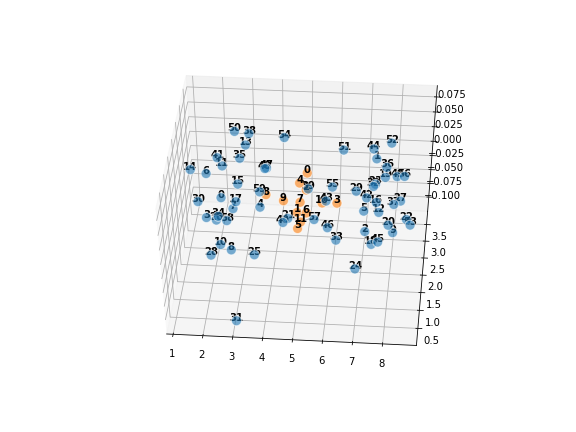

In [282]:
vis_3d_clusters(ds,cm_agglomeratve_df,100,True)

In [112]:
# Agg_clusters.n_clusters_
# Agg_clusters_label = Agg_clusters.labels_
# centroid = clf.centroids_
# clf.classes_
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*centroid.T, s=100, alpha=0.6, edgecolors='w',color=colors[Agg_clusters.labels_])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)

# HDBSCAN

<IPython.core.display.Javascript object>


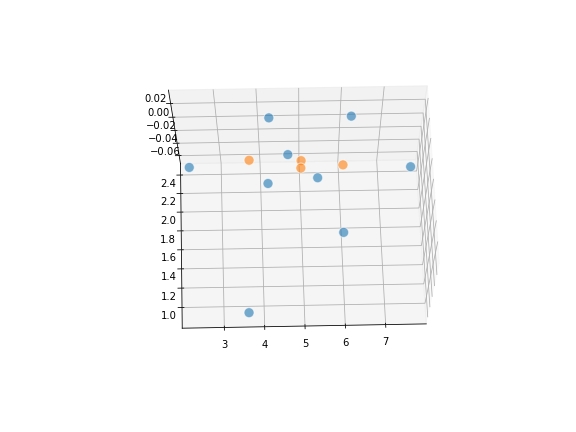

In [283]:
import hdbscan
cm_hdbscan = hdbscan.HDBSCAN(alpha=1.0,min_cluster_size=3)
cm_hdbscan_df = cm_methonds(cm_hdbscan,ds)
vis_3d_clusters(ds,cm_hdbscan_df)

# DBSCAN

<IPython.core.display.Javascript object>


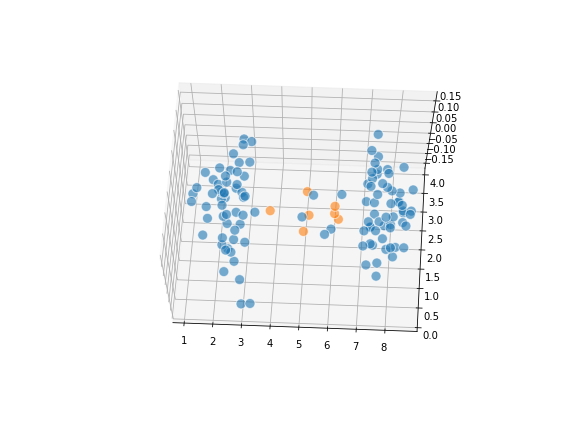

In [256]:
from sklearn.cluster import DBSCAN
cm_dbscan = DBSCAN(eps=0.1,min_samples=2) #0.1-0.4 有类
cm_dbscan_df = cm_methonds(cm_dbscan,ds)
vis_3d_clusters(ds,cm_dbscan_df)

In [246]:
cm_dbscan = DBSCAN(eps=1,min_samples=2)
X = ds.df[ds.feature_cols].values
# label = ds.label_col
# y = ds.df[label]
# cluster_label = y.unique()
# newDf = pd.DataFrame(columns=ds.df.columns)
# for i in cluster_label:
#     tmpDf = pd.DataFrame(columns=ds.df.columns)
#     feature_col = ds.feature_cols
#     label = ds.label_col
#     cluster_X = df[df[label]==i][feature_col].values
#     sub_clusters = cm_dbscan.fit(cluster_X)
# #     sub_clusters.n_clusters_
#     sub_clusters.labels_
#     cluster_X.shape
#     clf = NearestCentroid()
#     clf.fit(cluster_X,sub_clusters.labels_)
#     centroid = clf.centroids_
#     tmpDf[label] = i
#     tmpDf[feature_col] = centroid
#     tmpDf[label] = i
# #     centroid
#     newDf = newDf.append(tmpDf)
# #     newDf
# #     sub_clusters_centroid = clf.centroids_
# newDf.shape

(940, 3)

array([  0,   1,  -1,   2,   3,   4,   1,   5,  -1,   6,   7,  -1,  -1,
         1,  -1,   6,  -1,  -1,  -1,  -1,   8,   4,  -1,   9,  -1,  -1,
        -1,  -1,  -1,  -1,  10,  -1,  -1,  11,  12,  -1,  13,  14,   2,
        15,  -1,  -1,  16,  17,  -1,  18,  -1,  -1,   5,   0,  19,  20,
        -1,  -1,  -1,  -1,  -1,  -1,  13,  18,  -1,  21,  -1,  -1,  -1,
        -1,  -1,  -1,  13,  -1,   9,  -1,  22,  23,  24,  -1,  -1,  -1,
        25,  -1,  26,  27,  28,  -1,  -1,  -1,   9,  -1,  -1,  29,  17,
        -1,  -1,  -1,   2,  -1,  -1,  30,   2,  -1,  31,  14,  -1,   6,
        -1,  -1,  -1,  -1,  32,  -1,  -1,  -1,  -1,  32,  33,  -1,  23,
        21,  24,  34,  -1,  -1,  -1,  -1,  13,  19,  35,  -1,  -1,  36,
        -1,  28,  10,   5,  -1,  36,  -1,  37,  -1,  -1,  -1,  -1,   2,
        12,  38,  -1,  15,  39,  -1,  15,  40,  41,  37,  42,   9,  -1,
        40,   8,   5,  24,   0,  -1,  37,  -1,   5,  -1,  16,  30,  43,
        -1,  22,   3,  10,  -1,  -1,   9,   0,   7,  -1,  -1,  -